<center><font color ="orange"> <b>Lending Club Case Study </b></font></center>

## Problem statement

-   The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

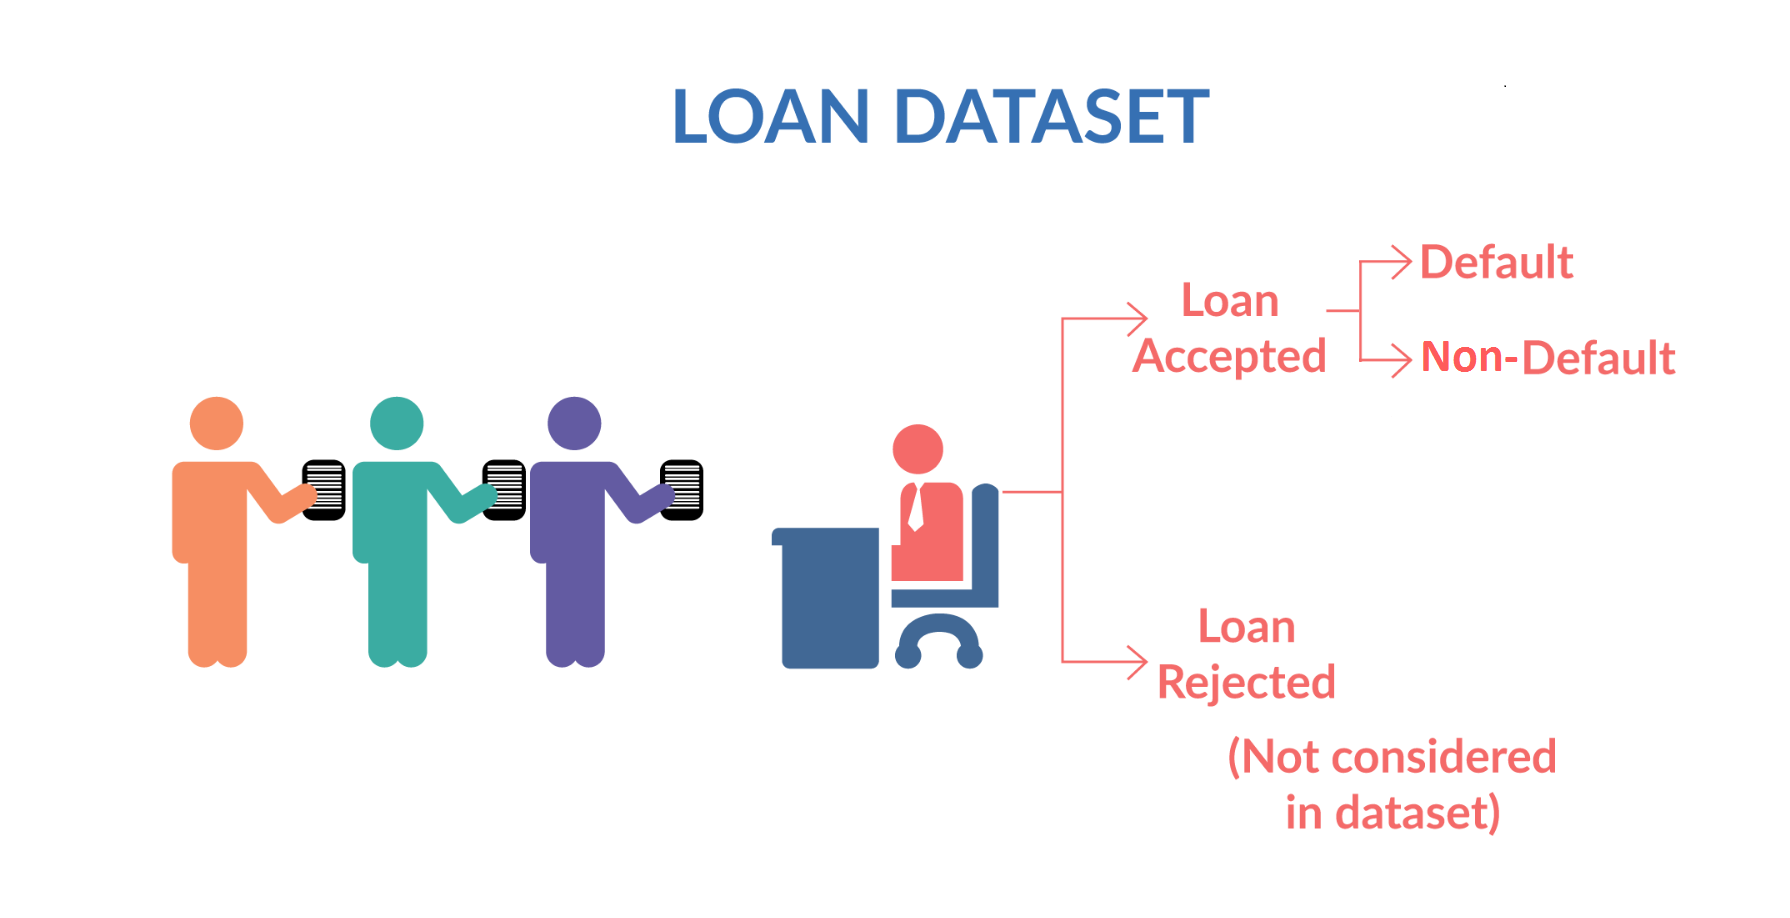

## Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df= pd.read_csv("loan.csv")
df.head()

/tmp/ipykernel_9681/120444976.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("loan.csv")


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
df.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [8]:
df.describe().T

count           mean            std      min  \
id                          39717.0  683131.913060  210694.132915  54734.0   
member_id                   39717.0  850463.559408  265678.307421  70699.0   
loan_amnt                   39717.0   11219.443815    7456.670694    500.0   
funded_amnt                 39717.0   10947.713196    7187.238670    500.0   
funded_amnt_inv             39717.0   10397.448868    7128.450439      0.0   
...                             ...            ...            ...      ...   
tax_liens                   39678.0       0.000000       0.000000      0.0   
tot_hi_cred_lim                 0.0            NaN            NaN      NaN   
total_bal_ex_mort               0.0            NaN            NaN      NaN   
total_bc_limit                  0.0            NaN            NaN      NaN   
total_il_high_credit_limit      0.0            NaN            NaN      NaN   

                                 25%       50%        75%        max  
id                          516221.0  665665.0   837755.0  1077501.0  
member_id                   666780.0  850812.0  1047339.0  1314167.0  
loan_amnt                     5500.0   10000.0    15000.0    35000.0  
funded_amnt                   5400.0    9600.0    15000.0    35000.0  
funded_amnt_inv               5000.0    8975.0    14400.0    35000.0  
...                              ...       ...        ...        ...  
tax_liens                        0.0       0.0        0.0        0.0  
tot_hi_cred_lim                  NaN       NaN        NaN        NaN  
total_bal_ex_mort                NaN       NaN        NaN        NaN  
total_bc_limit                   NaN       NaN        NaN        NaN  
total_il_high_credit_limit       NaN       NaN        NaN        NaN  

[87 rows x 8 columns]

In [9]:
df.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

In [10]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

## Data Cleaning

In [11]:
def totalnullvalues(data):
    for col in data.columns:
         print(col, data[col].isnull().sum())

In [12]:
totalnullvalues(df)

id 0
member_id 0
loan_amnt 0
funded_amnt 0
funded_amnt_inv 0
term 0
int_rate 0
installment 0
grade 0
sub_grade 0
emp_title 2459
emp_length 1075
home_ownership 0
annual_inc 0
verification_status 0
issue_d 0
loan_status 0
pymnt_plan 0
url 0
desc 12942
purpose 0
title 11
zip_code 0
addr_state 0
dti 0
delinq_2yrs 0
earliest_cr_line 0
inq_last_6mths 0
mths_since_last_delinq 25682
mths_since_last_record 36931
open_acc 0
pub_rec 0
revol_bal 0
revol_util 50
total_acc 0
initial_list_status 0
out_prncp 0
out_prncp_inv 0
total_pymnt 0
total_pymnt_inv 0
total_rec_prncp 0
total_rec_int 0
total_rec_late_fee 0
recoveries 0
collection_recovery_fee 0
last_pymnt_d 71
last_pymnt_amnt 0
next_pymnt_d 38577
last_credit_pull_d 2
collections_12_mths_ex_med 56
mths_since_last_major_derog 39717
policy_code 0
application_type 0
annual_inc_joint 39717
dti_joint 39717
verification_status_joint 39717
acc_now_delinq 0
tot_coll_amt 39717
tot_cur_bal 39717
open_acc_6m 39717
open_il_6m 39717
open_il_12m 39717
open_il_2

In [13]:
for col in df.columns:
         print(col, df[col].isnull().sum()*100/len(df))


id 0.0
member_id 0.0
loan_amnt 0.0
funded_amnt 0.0
funded_amnt_inv 0.0
term 0.0
int_rate 0.0
installment 0.0
grade 0.0
sub_grade 0.0
emp_title 6.191303472064859
emp_length 2.7066495455346575
home_ownership 0.0
annual_inc 0.0
verification_status 0.0
issue_d 0.0
loan_status 0.0
pymnt_plan 0.0
url 0.0
desc 32.58554271470655
purpose 0.0
title 0.027695948838029054
zip_code 0.0
addr_state 0.0
dti 0.0
delinq_2yrs 0.0
earliest_cr_line 0.0
inq_last_6mths 0.0
mths_since_last_delinq 64.66248709620565
mths_since_last_record 92.98537150338646
open_acc 0.0
pub_rec 0.0
revol_bal 0.0
revol_util 0.12589067653649572
total_acc 0.0
initial_list_status 0.0
out_prncp 0.0
out_prncp_inv 0.0
total_pymnt 0.0
total_pymnt_inv 0.0
total_rec_prncp 0.0
total_rec_int 0.0
total_rec_late_fee 0.0
recoveries 0.0
collection_recovery_fee 0.0
last_pymnt_d 0.1787647606818239
last_pymnt_amnt 0.0
next_pymnt_d 97.1296925749679
last_credit_pull_d 0.0050356270614598285
collections_12_mths_ex_med 0.1409975577208752
mths_since_last

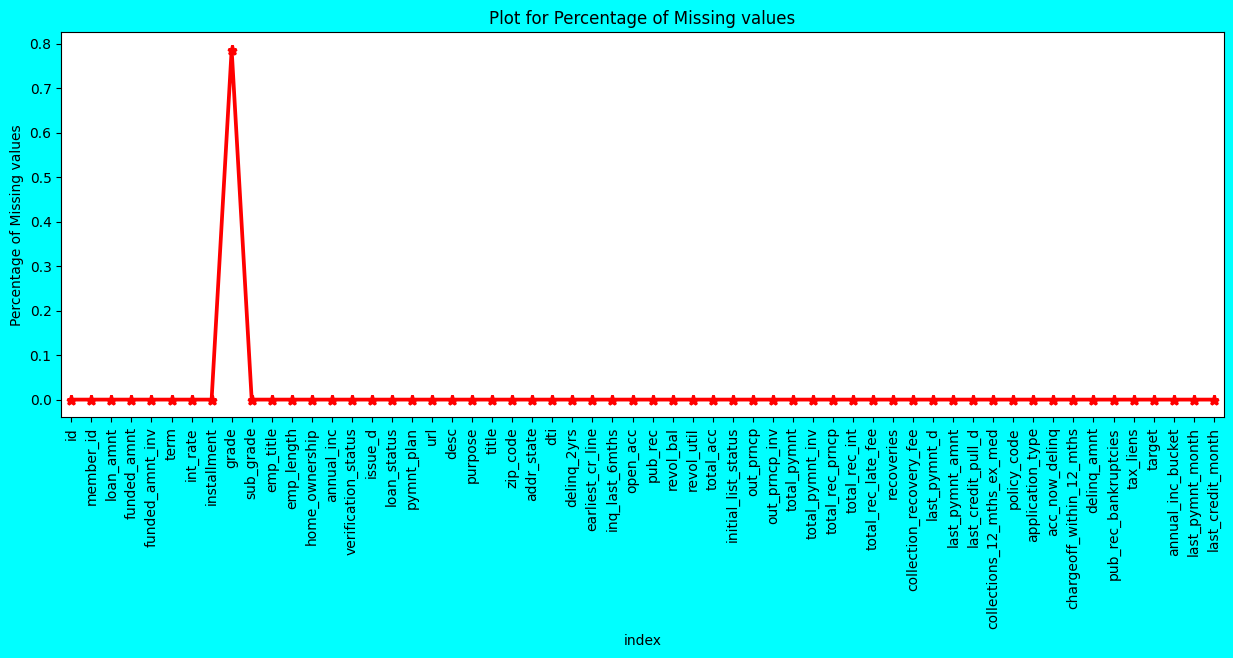

<Figure size 640x480 with 0 Axes>

In [110]:
# plotting Percentage of Missing values in each column
miss_data = pd.DataFrame( (df.isnull().sum()) * 100 / df.shape[0]).reset_index()

plt.figure(figsize = (15,5),facecolor='cyan')

ax = sns.pointplot(data = miss_data,x='index',y= 0, color='Red',markers='*')

plt.xticks(rotation = 90, fontsize = 10)

plt.title("Plot for Percentage of Missing values")

plt.ylabel("Percentage of Missing values")

plt.show()

plt.savefig('1.jpg')

### Handiling Missing values

In [15]:
df=df.dropna(axis=1,how='all')

In [16]:
totalnullvalues(df)


id 0
member_id 0
loan_amnt 0
funded_amnt 0
funded_amnt_inv 0
term 0
int_rate 0
installment 0
grade 0
sub_grade 0
emp_title 2459
emp_length 1075
home_ownership 0
annual_inc 0
verification_status 0
issue_d 0
loan_status 0
pymnt_plan 0
url 0
desc 12942
purpose 0
title 11
zip_code 0
addr_state 0
dti 0
delinq_2yrs 0
earliest_cr_line 0
inq_last_6mths 0
mths_since_last_delinq 25682
mths_since_last_record 36931
open_acc 0
pub_rec 0
revol_bal 0
revol_util 50
total_acc 0
initial_list_status 0
out_prncp 0
out_prncp_inv 0
total_pymnt 0
total_pymnt_inv 0
total_rec_prncp 0
total_rec_int 0
total_rec_late_fee 0
recoveries 0
collection_recovery_fee 0
last_pymnt_d 71
last_pymnt_amnt 0
next_pymnt_d 38577
last_credit_pull_d 2
collections_12_mths_ex_med 56
policy_code 0
application_type 0
acc_now_delinq 0
chargeoff_within_12_mths 56
delinq_amnt 0
pub_rec_bankruptcies 697
tax_liens 39


In [17]:
df.isnull().sum()*100/len(df)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [18]:
df=df.drop(columns=['mths_since_last_delinq', 'mths_since_last_record','next_pymnt_d'],axis=1)

In [19]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0   10.65%       162.87     B        B2  ...          171.62   
1   15.27%        59.83     C        C4  ...          119.66   
2   15.96%        84.33     C        C5  ...          649.91   
3   13.49%       339.31     C        C1  ...          357.48   
4   12.69%        67.79     B        B5  ...           67.79   

  last_credit_pull_d collections_12_mths_ex_med  policy_code application_type  \
0             May-16                        0.0            1       INDIVIDUAL   
1             Sep-13                        0.0            1       INDIVIDUAL   
2             May-16                        0.0            1       INDIVIDUAL   
3             Apr-16                        0.0            1       INDIVIDUAL   
4             May-16                        0.0            1       INDIVIDUAL   

  acc_now_delinq chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies  \
0              0                      0.0           0                  0.0   
1              0                      0.0           0                  0.0   
2              0                      0.0           0                  0.0   
3              0                      0.0           0                  0.0   
4              0                      0.0           0                  0.0   

  tax_liens  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  

[5 rows x 54 columns]

In [20]:
df.desc.head()

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object

In [21]:
df.desc.value_counts()

desc
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           210
Debt Consolidation                                                                                                                                                                  

In [22]:
df.desc.mode()

0     
Name: desc, dtype: object

In [23]:
df['desc']=df.desc.fillna(df.desc.mode())

In [24]:
df.dropna(axis=0,inplace=True)

In [25]:
df.loan_status.value_counts()

loan_status
Fully Paid     20397
Charged Off     3328
Current          679
Name: count, dtype: int64

In [26]:
df['target']=df.loan_status.apply(lambda x: 1 if x=="Charged Off" else 0)

#### Key Takeaway: 
Here 0 represent the not defaulted  and 1 represent the defaulted.

In [27]:
df['int_rate']=df.int_rate.apply(lambda x: float(x[:-1]))

In [28]:
df['int_rate'].head()

1    15.27
3    13.49
4    12.69
6    15.96
7    18.64
Name: int_rate, dtype: float64

In [29]:
df['term']=df.term.apply(lambda x: int(x[:3]))
df['term'].head()

1    60
3    36
4    60
6    60
7    36
Name: term, dtype: int64

In [30]:
df['revol_util'] = df['revol_util'].apply(lambda x: float(x[:-1]))

In [31]:
df['revol_util'].head()

1     9.4
3    21.0
4    53.9
6    85.6
7    87.5
Name: revol_util, dtype: float64

## Exploratory Data Analysis

In [32]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
1  1077430    1314167       2500         2500           2500.0    60   
3  1076863    1277178      10000        10000          10000.0    36   
4  1075358    1311748       3000         3000           3000.0    60   
6  1069639    1304742       7000         7000           7000.0    60   
7  1072053    1288686       3000         3000           3000.0    36   

   int_rate  installment grade sub_grade  ... last_credit_pull_d  \
1     15.27        59.83     C        C4  ...             Sep-13   
3     13.49       339.31     C        C1  ...             Apr-16   
4     12.69        67.79     B        B5  ...             May-16   
6     15.96       170.08     C        C5  ...             May-16   
7     18.64       109.43     E        E1  ...             Dec-14   

  collections_12_mths_ex_med policy_code  application_type acc_now_delinq  \
1                        0.0           1        INDIVIDUAL              0   
3                        0.0           1        INDIVIDUAL              0   
4                        0.0           1        INDIVIDUAL              0   
6                        0.0           1        INDIVIDUAL              0   
7                        0.0           1        INDIVIDUAL              0   

  chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies tax_liens target  
1                      0.0           0                  0.0       0.0      1  
3                      0.0           0                  0.0       0.0      0  
4                      0.0           0                  0.0       0.0      0  
6                      0.0           0                  0.0       0.0      0  
7                      0.0           0                  0.0       0.0      0  

[5 rows x 55 columns]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24404 entries, 1 to 39623
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          24404 non-null  int64  
 1   member_id                   24404 non-null  int64  
 2   loan_amnt                   24404 non-null  int64  
 3   funded_amnt                 24404 non-null  int64  
 4   funded_amnt_inv             24404 non-null  float64
 5   term                        24404 non-null  int64  
 6   int_rate                    24404 non-null  float64
 7   installment                 24404 non-null  float64
 8   grade                       24404 non-null  object 
 9   sub_grade                   24404 non-null  object 
 10  emp_title                   24404 non-null  object 
 11  emp_length                  24404 non-null  object 
 12  home_ownership              24404 non-null  object 
 13  annual_inc                  24404 no

In [34]:
df.describe().T

count           mean            std        min  \
id                          24404.0  658166.811178  207093.377156   55742.00   
member_id                   24404.0  817011.909523  264709.601957  114426.00   
loan_amnt                   24404.0   11630.774668    7355.480685     500.00   
funded_amnt                 24404.0   11324.460129    7081.442931     500.00   
funded_amnt_inv             24404.0   10759.266274    7023.252396       0.00   
term                        24404.0      42.453368      10.641406      36.00   
int_rate                    24404.0      12.090716       3.651300       5.42   
installment                 24404.0     336.236721     206.049525      16.08   
annual_inc                  24404.0   69340.677228   57610.374236    4000.00   
dti                         24404.0      13.471279       6.631951       0.00   
delinq_2yrs                 24404.0       0.141739       0.475379       0.00   
inq_last_6mths              24404.0       0.877315       1.078463       0.00   
open_acc                    24404.0       9.412187       4.341150       2.00   
pub_rec                     24404.0       0.054458       0.235954       0.00   
revol_bal                   24404.0   13661.889936   15679.512879       0.00   
revol_util                  24404.0      49.040435      28.074402       0.00   
total_acc                   24404.0      22.342772      11.308792       2.00   
out_prncp                   24404.0      51.472155     381.600327       0.00   
out_prncp_inv               24404.0      51.198743     380.120259       0.00   
total_pymnt                 24404.0   12602.880027    8982.882623      33.73   
total_pymnt_inv             24404.0   11992.752253    8875.509611       0.00   
total_rec_prncp             24404.0   10154.313996    7000.667381       0.00   
total_rec_int               24404.0    2351.543651    2622.280934       6.22   
total_rec_late_fee          24404.0       1.398292       7.389733       0.00   
recoveries                  24404.0      95.624195     683.944839       0.00   
collection_recovery_fee     24404.0      12.975127     150.850194       0.00   
last_pymnt_amnt             24404.0    2775.391002    4466.513335       0.01   
collections_12_mths_ex_med  24404.0       0.000000       0.000000       0.00   
policy_code                 24404.0       1.000000       0.000000       1.00   
acc_now_delinq              24404.0       0.000000       0.000000       0.00   
chargeoff_within_12_mths    24404.0       0.000000       0.000000       0.00   
delinq_amnt                 24404.0       0.000000       0.000000       0.00   
pub_rec_bankruptcies        24404.0       0.041264       0.199726       0.00   
tax_liens                   24404.0       0.000000       0.000000       0.00   
target                      24404.0       0.136371       0.343189       0.00   

                                      25%            50%           75%  \
id                          482458.000000  628885.000000  8.156080e+05   
member_id                   612931.000000  805130.500000  1.022824e+06   
loan_amnt                     6000.000000   10000.000000  1.500000e+04   
funded_amnt                   6000.000000   10000.000000  1.500000e+04   
funded_amnt_inv               5400.000000    9570.707127  1.475000e+04   
term                            36.000000      36.000000  6.000000e+01   
int_rate                         9.620000      11.890000  1.446000e+01   
installment                    180.960000     298.895000  4.485550e+02   
annual_inc                   42000.000000   60000.000000  8.300000e+04   
dti                              8.407500      13.610000  1.872000e+01   
delinq_2yrs                      0.000000       0.000000  0.000000e+00   
inq_last_6mths                   0.000000       1.000000  1.000000e+00   
open_acc                         6.000000       9.000000  1.200000e+01   
pub_rec                          0.000000       0.000000  0.000000e+00   
revol_bal                     3967.0000

In [35]:
#List of numerical values
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
print('number of numerical_features:',len(numerical_features))
print("the numerical features:",numerical_features)

number of numerical_features: 35
the numerical features: ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'target']


In [36]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("number of discrete Variables Count: ",len(discrete_feature))
print("the discrete features:",discrete_feature)

number of discrete Variables Count:  12
the discrete features: ['term', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'target']


### Univariate Ananlysis

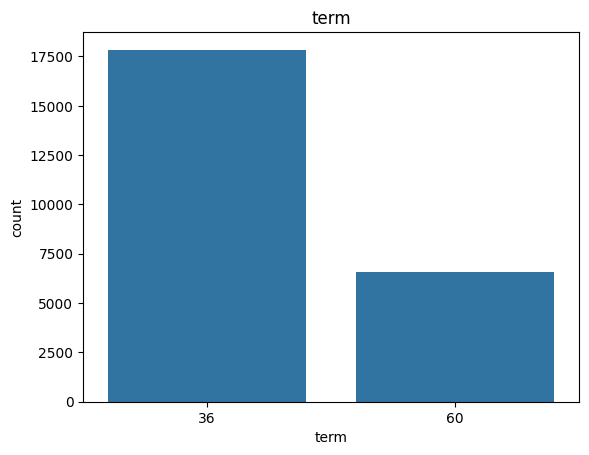

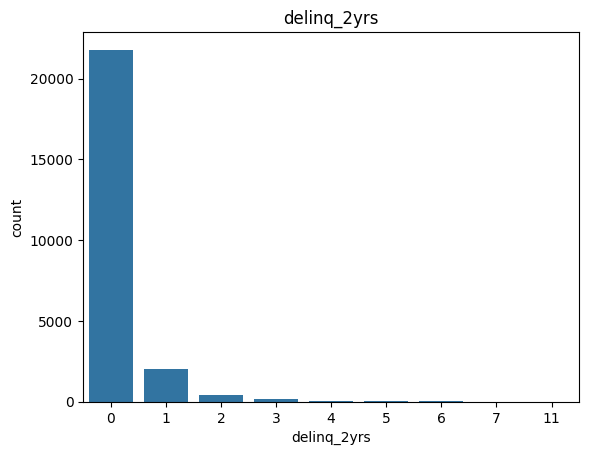

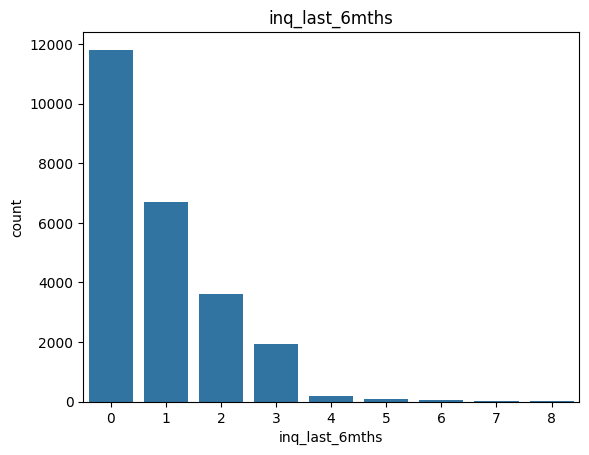

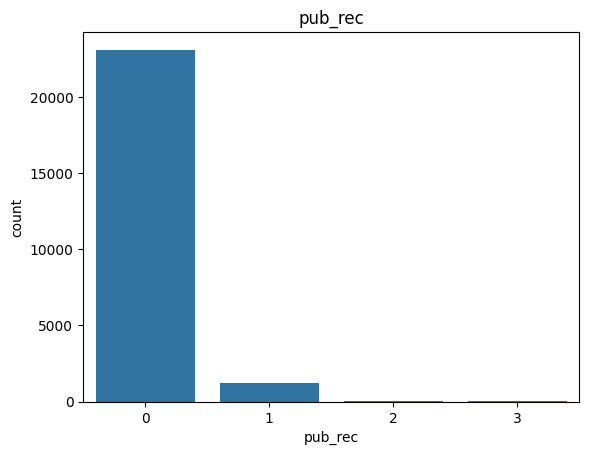

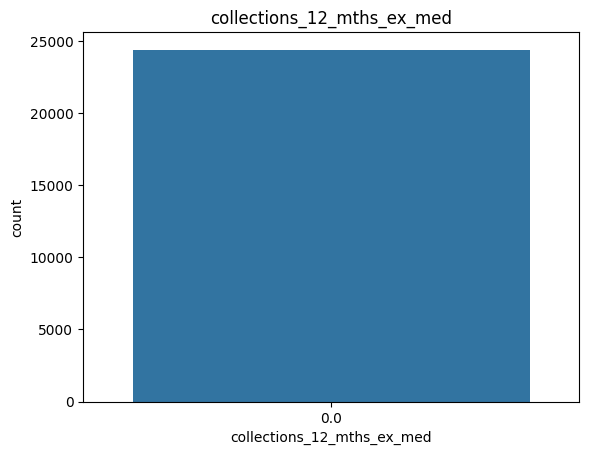

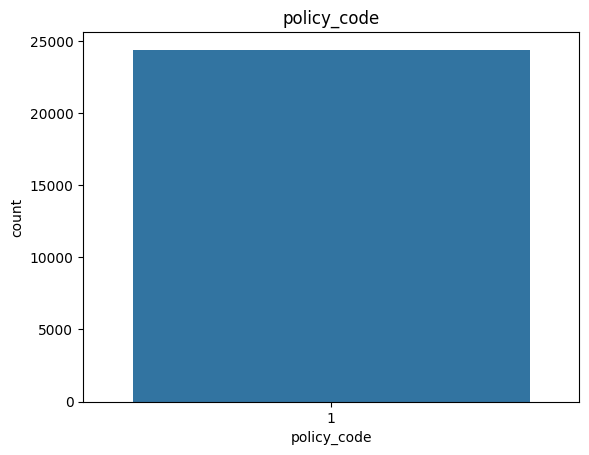

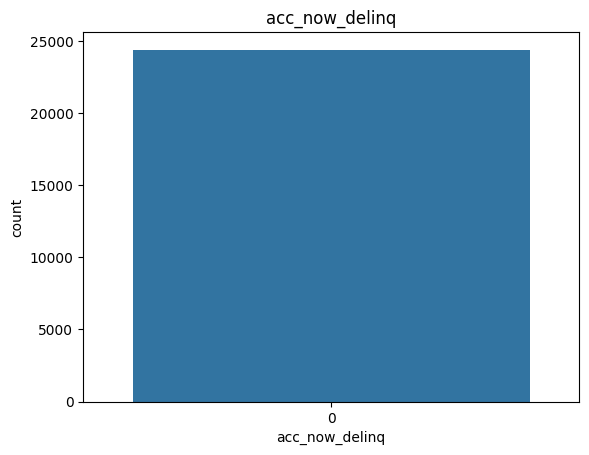

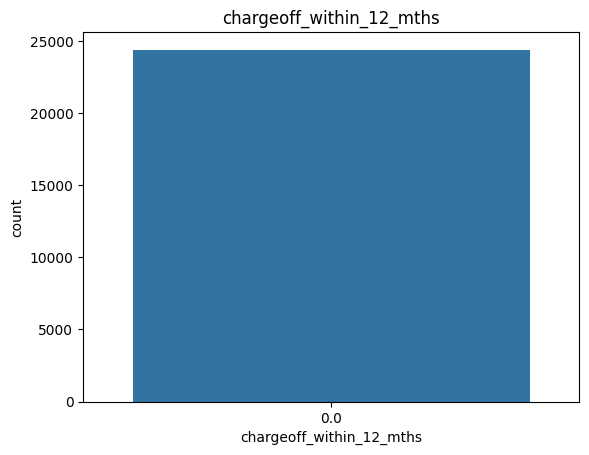

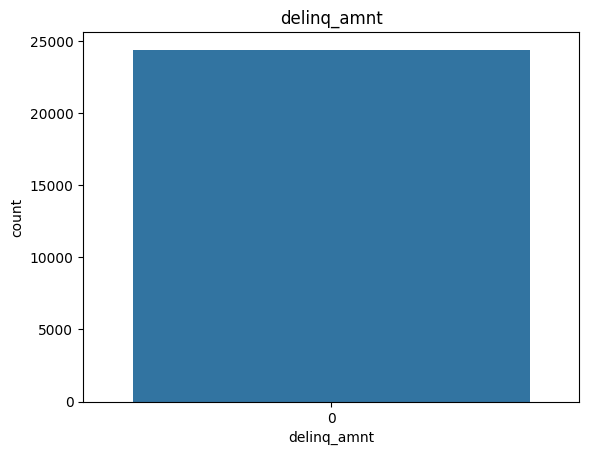

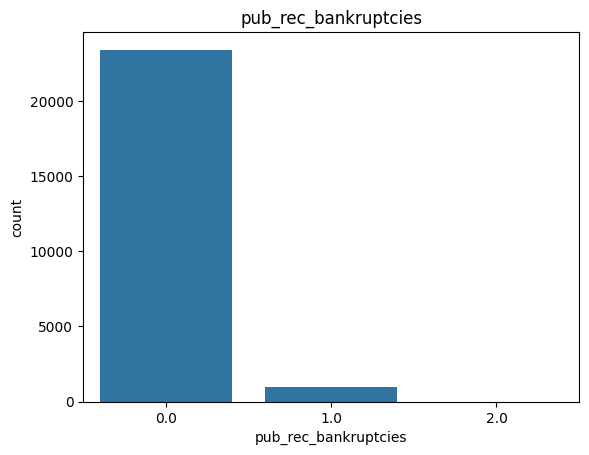

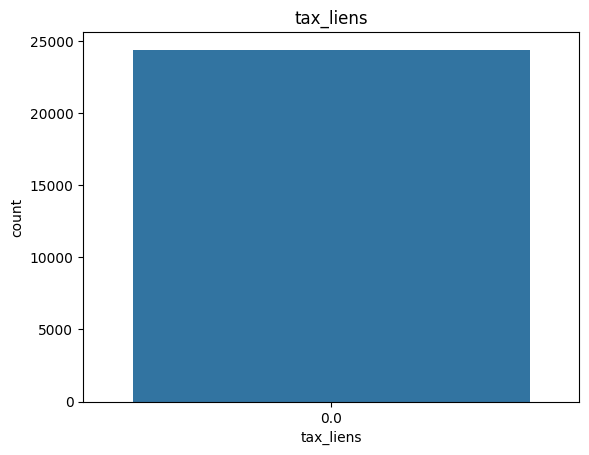

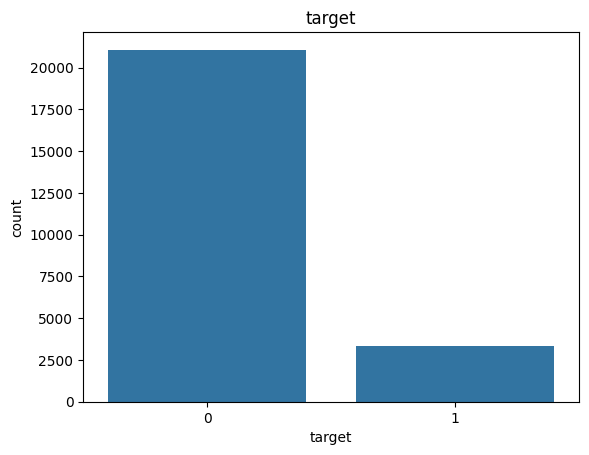

<Figure size 640x480 with 0 Axes>

In [111]:
for feature in discrete_feature:
    # data=df.copy()
    sns.countplot(data=df,x=df[feature])
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()
    plt.savefig("uni.png")

#### Key Takeaways:
We can observe the above graphs shows the count plots of all the discrete feature. 

In [38]:
###continuous feature
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count: ",len(continuous_feature))
print("the Continuous features:",continuous_feature)

Continuous feature Count:  23
the Continuous features: ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']


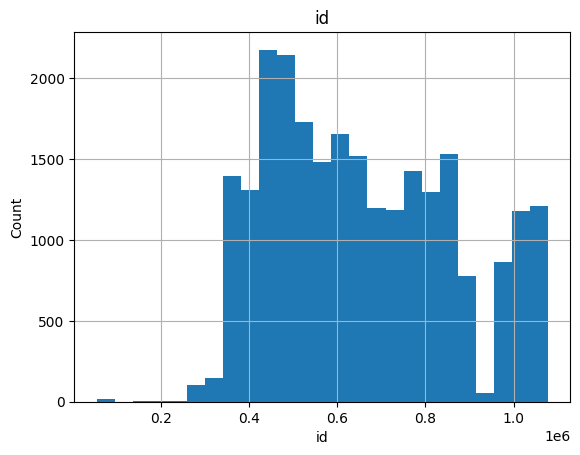

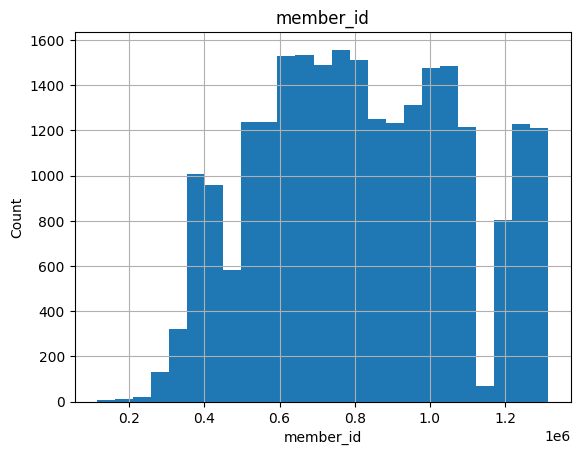

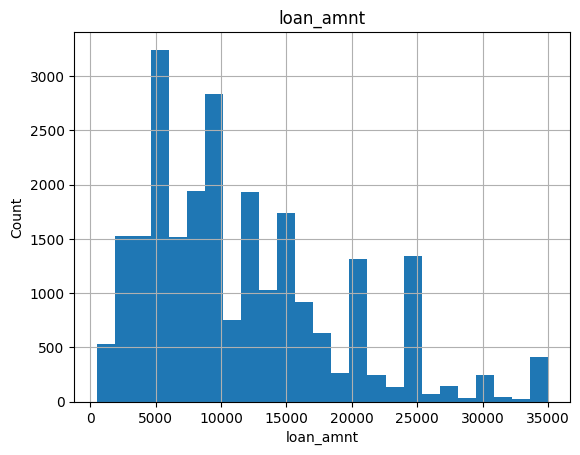

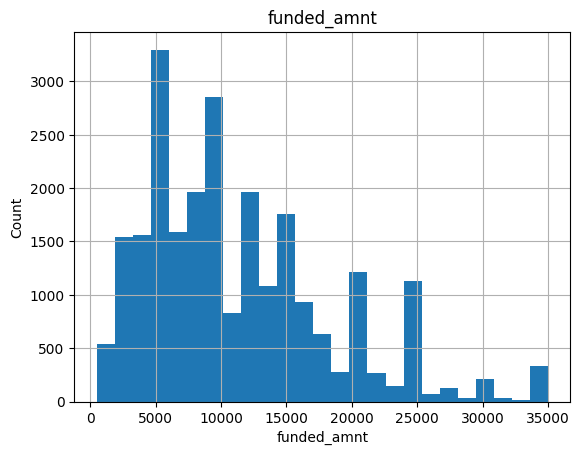

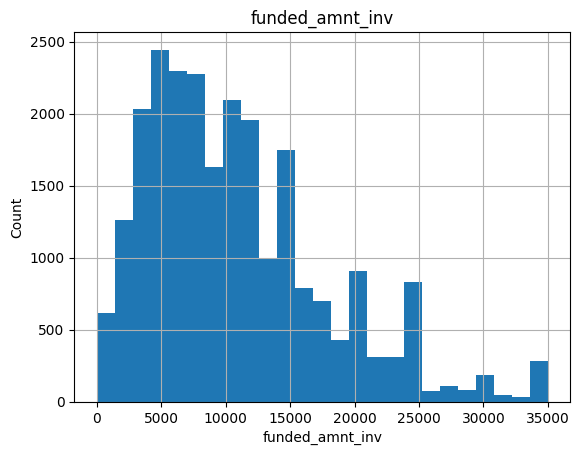

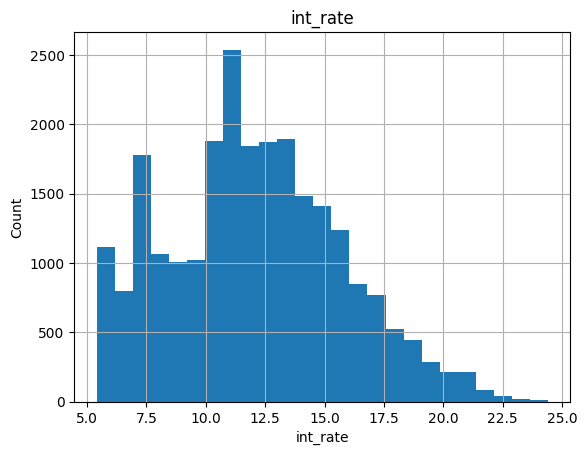

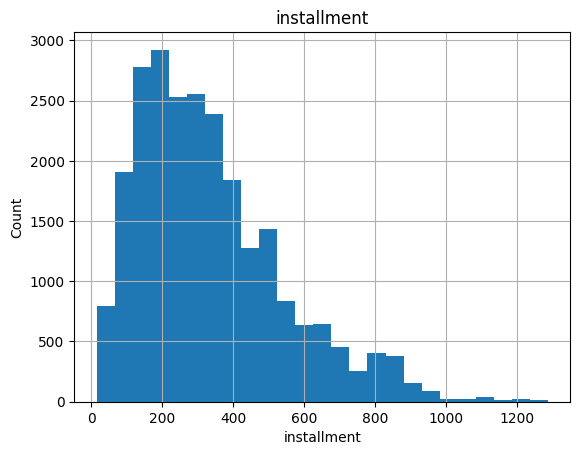

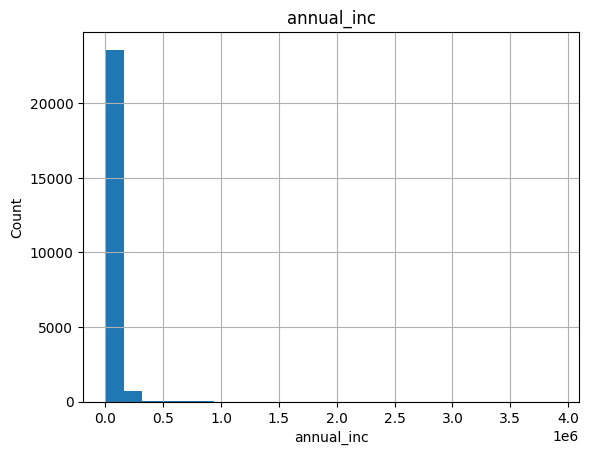

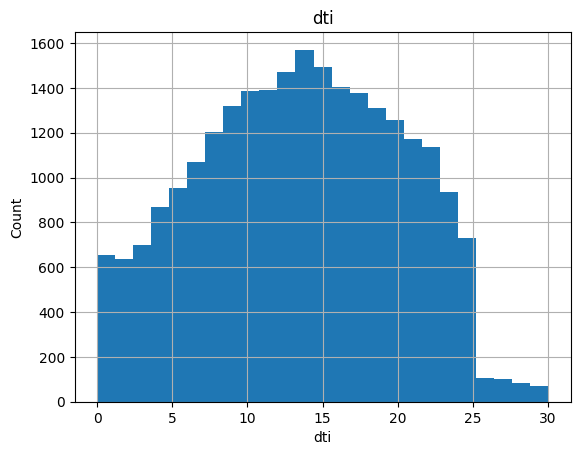

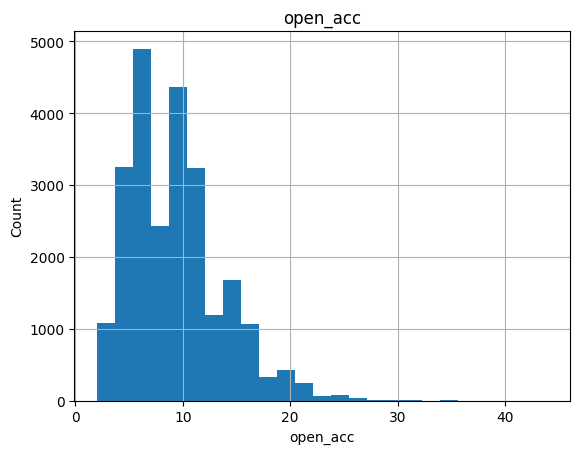

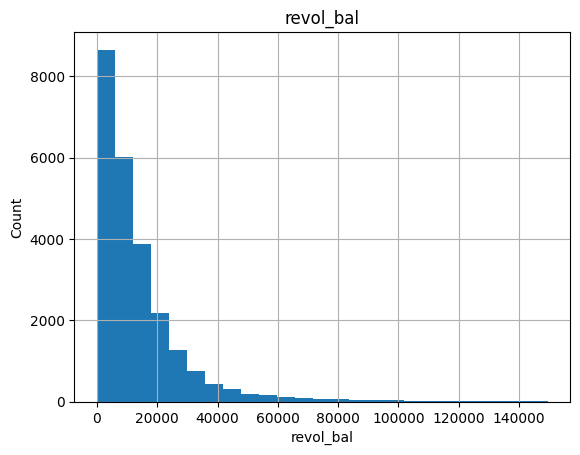

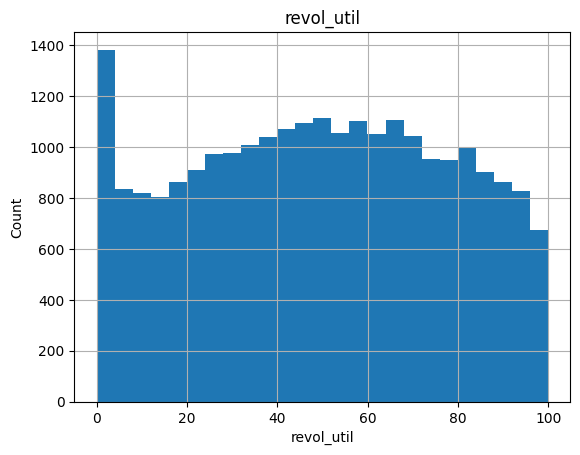

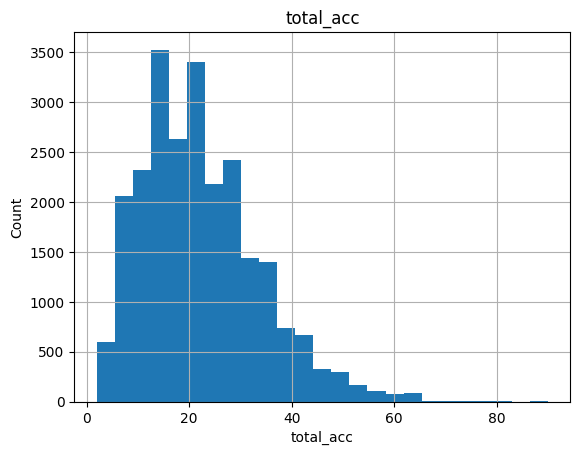

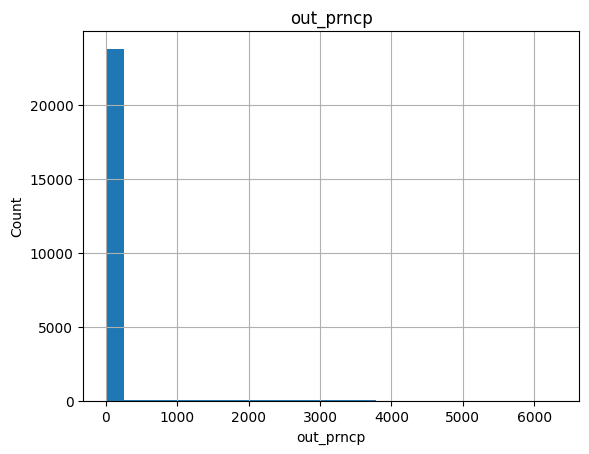

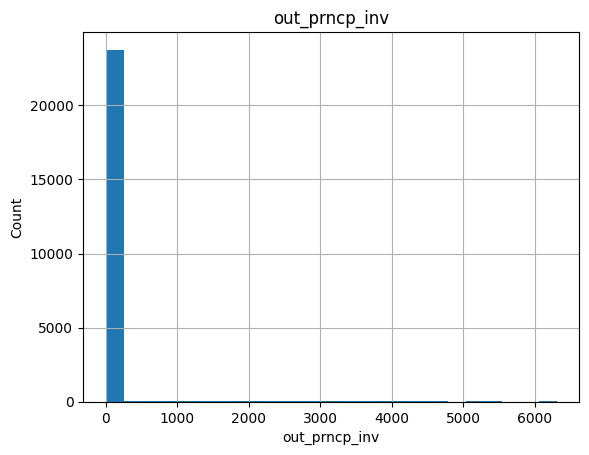

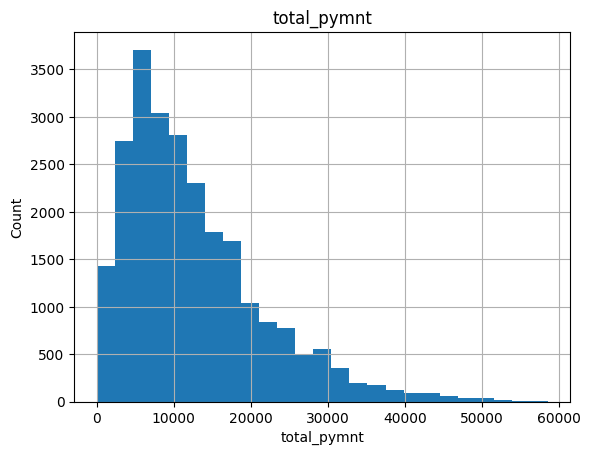

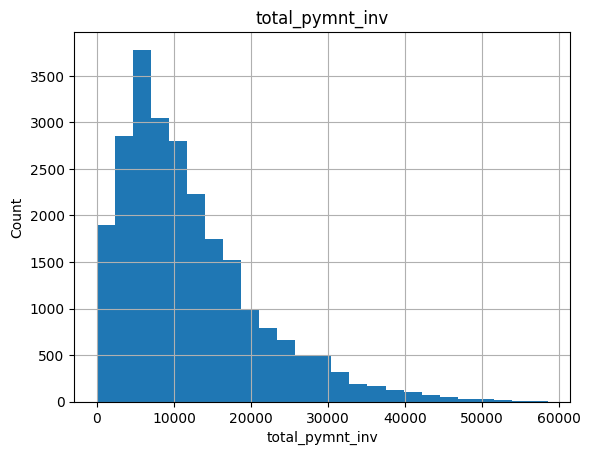

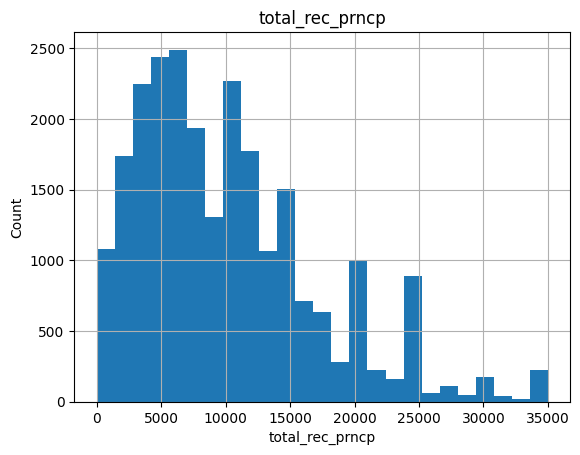

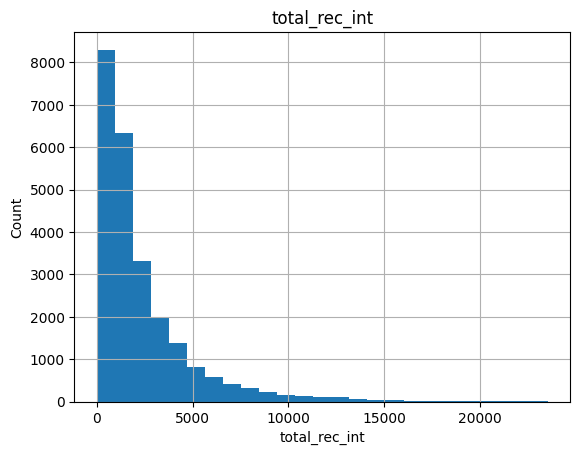

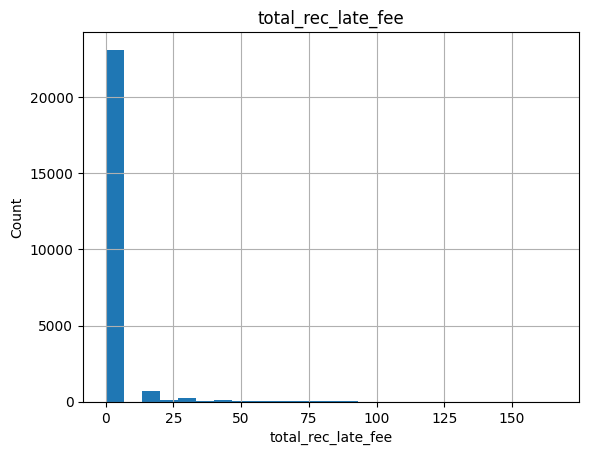

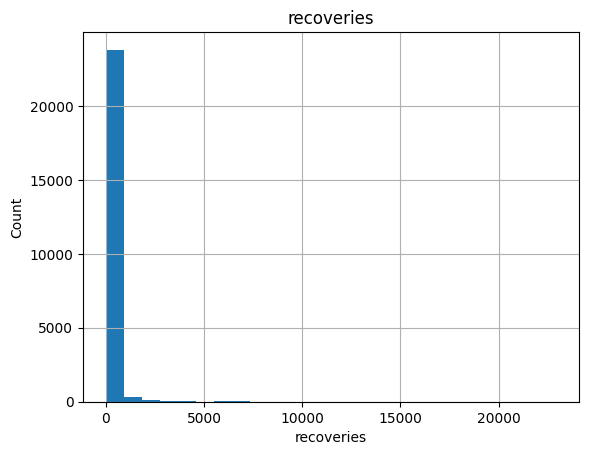

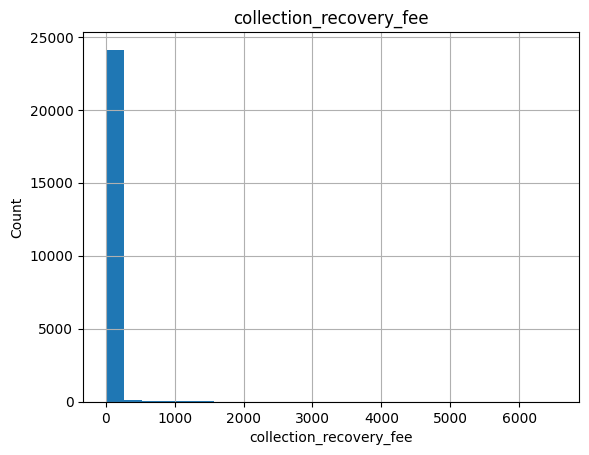

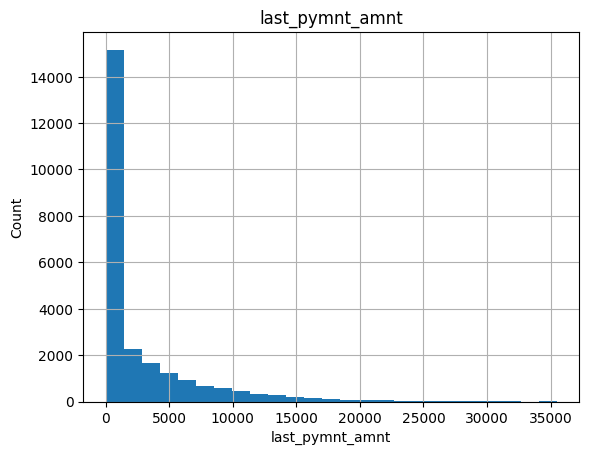

In [39]:
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    #plt.figure(figsize=(10,5))
    # sns.histplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

#### Key Takeaways:
We can observe the above graphs shows the histogram plots of all the continuous feature with the data distribution. 

In [40]:
#list of categorical features
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O']
categorical_features

['grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type']

In [41]:
categorical_features= [features for features in categorical_features if features not in ('emp_title', "url",'desc',"title")]

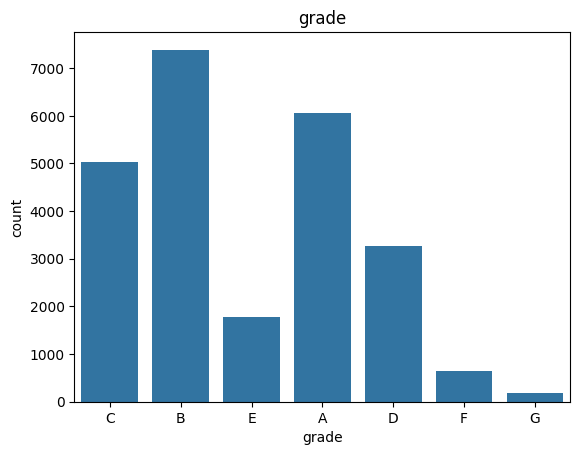

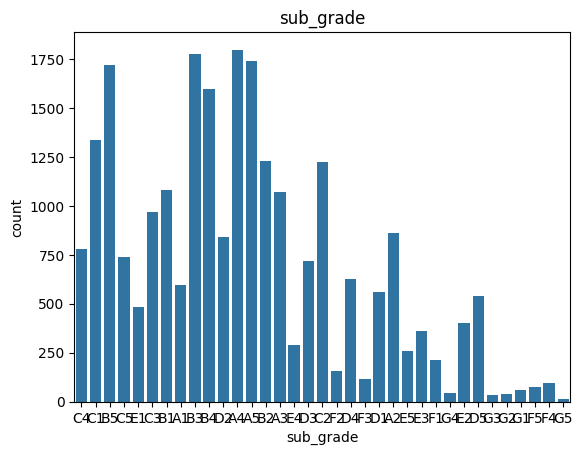

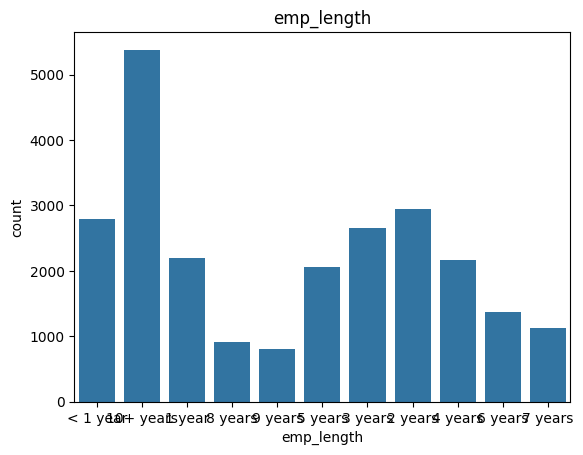

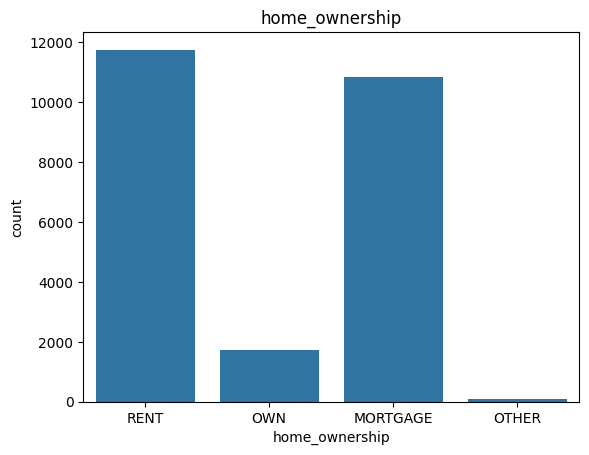

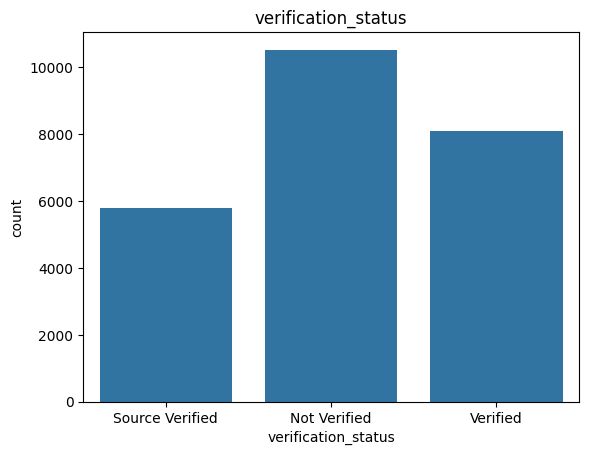

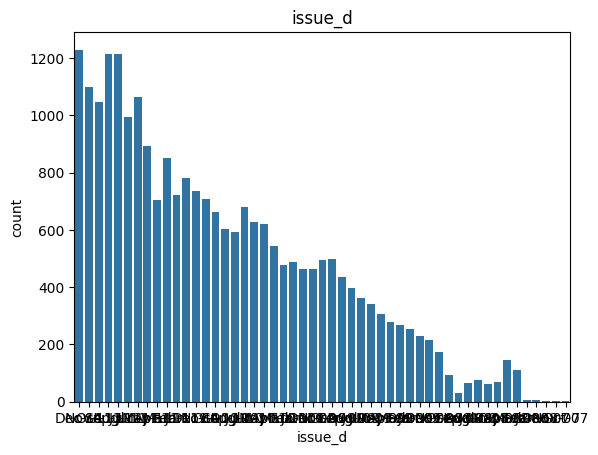

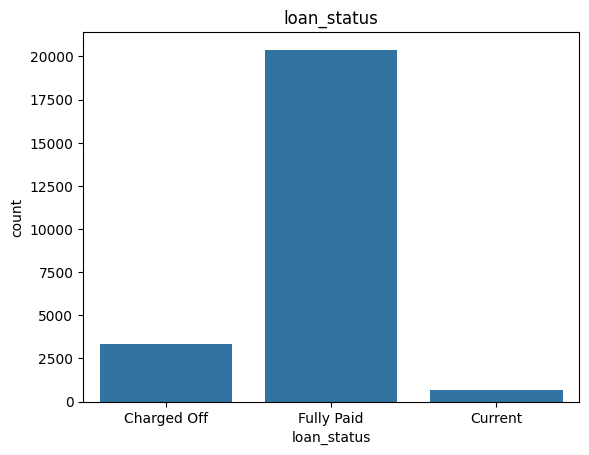

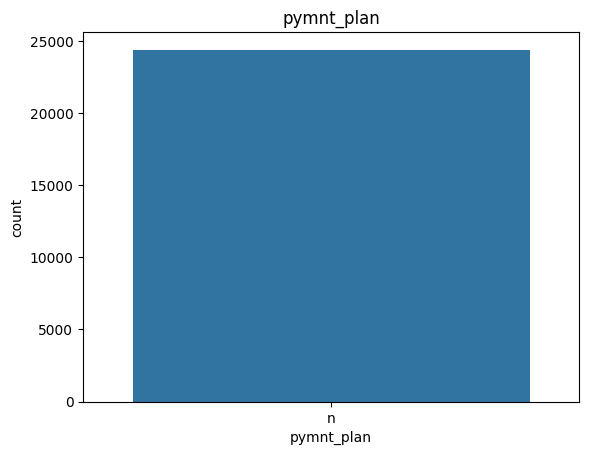

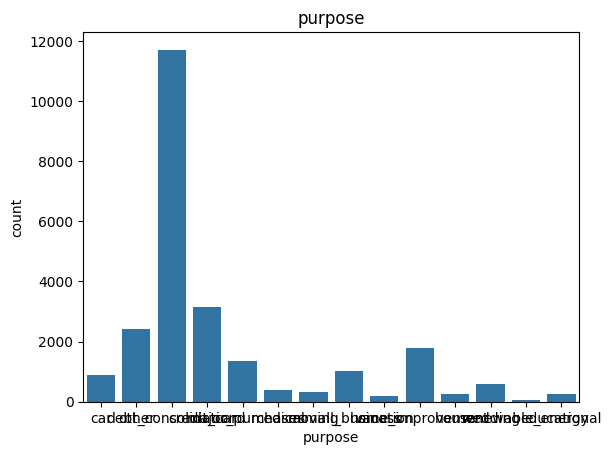

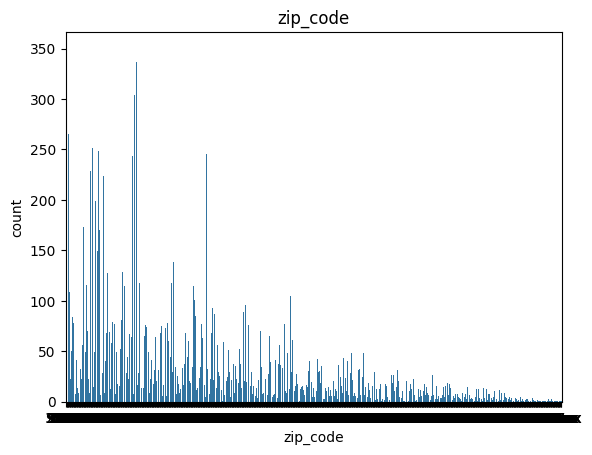

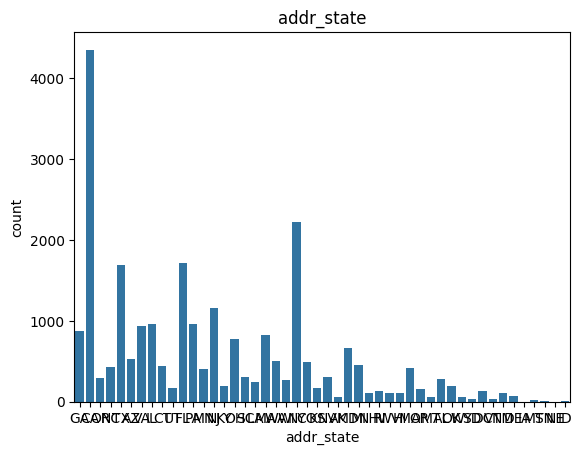

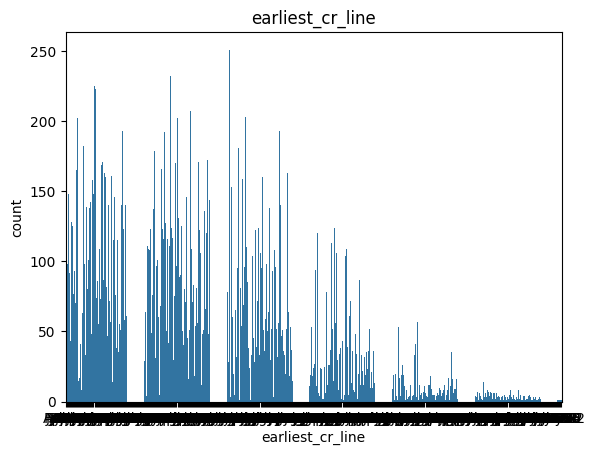

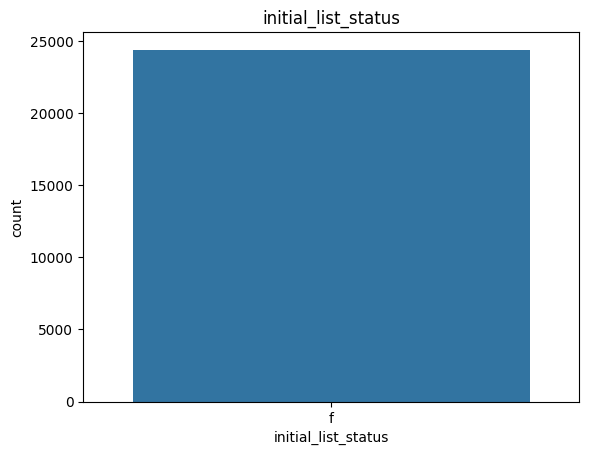

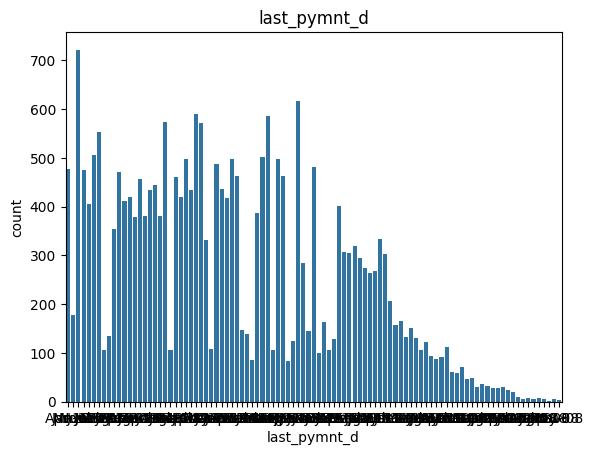

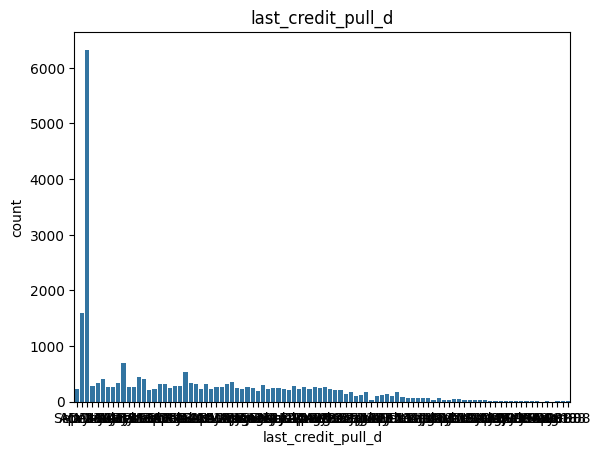

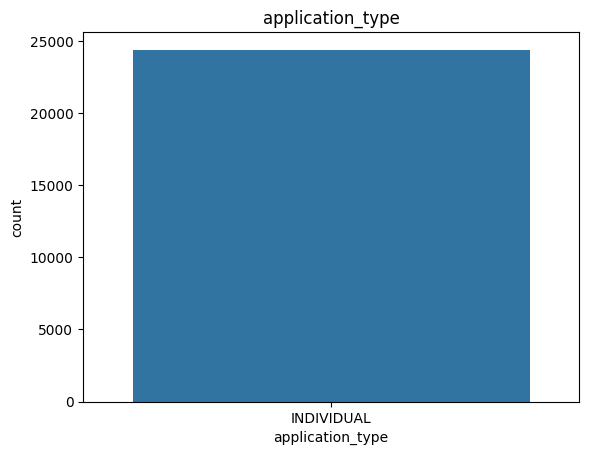

In [42]:
for feature in categorical_features:

    sns.countplot(data=df,x=data[feature])
#     data[feature].value_counts(normalize=True).plot.bar(title=feature)
    plt.xlabel(feature)
    
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

#### Key Takeaways:
We can observe the above graphs shows the count plots of all the categorical features. 

### Boxplot

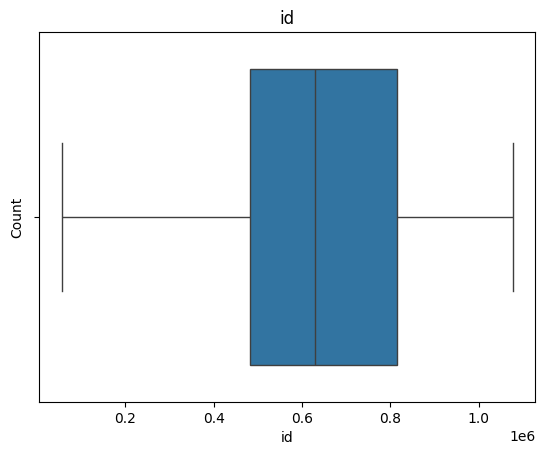

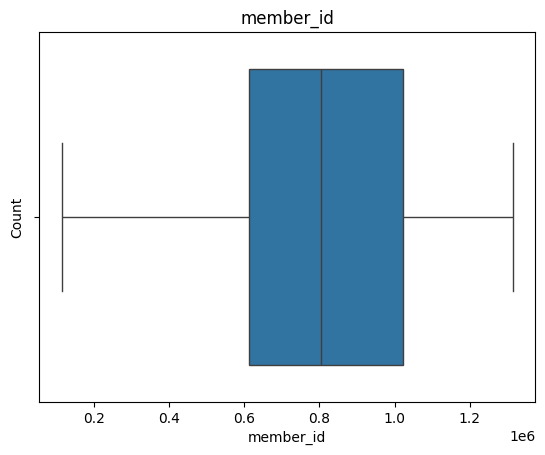

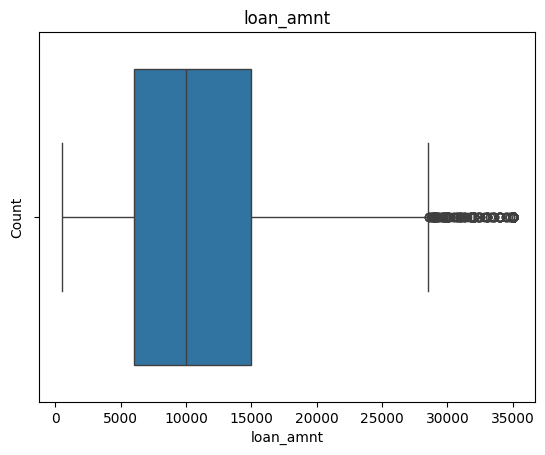

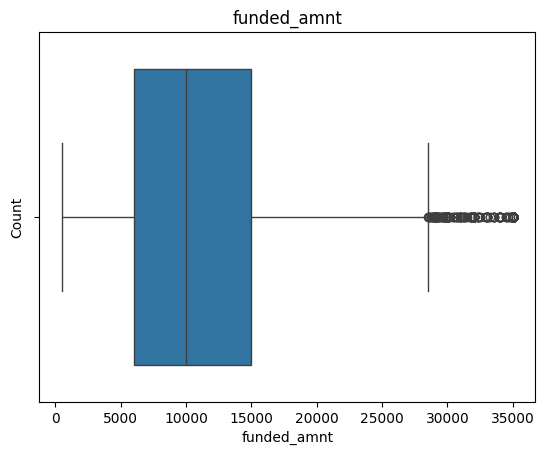

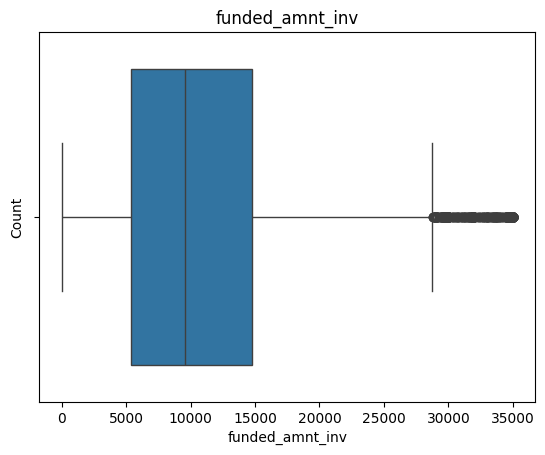

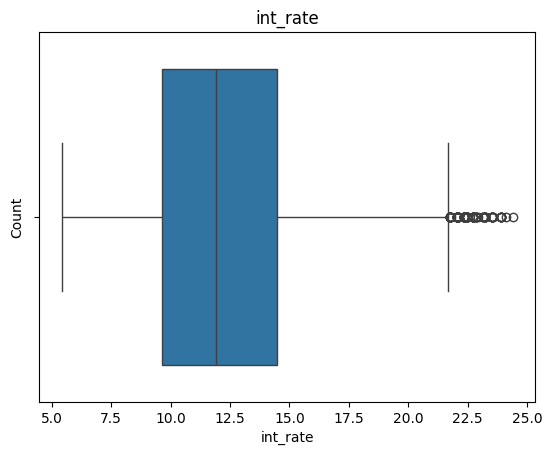

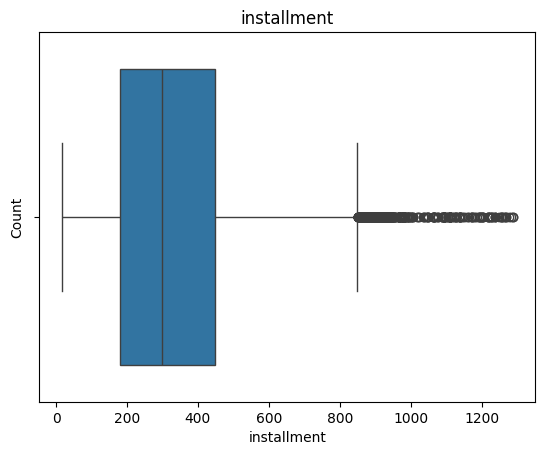

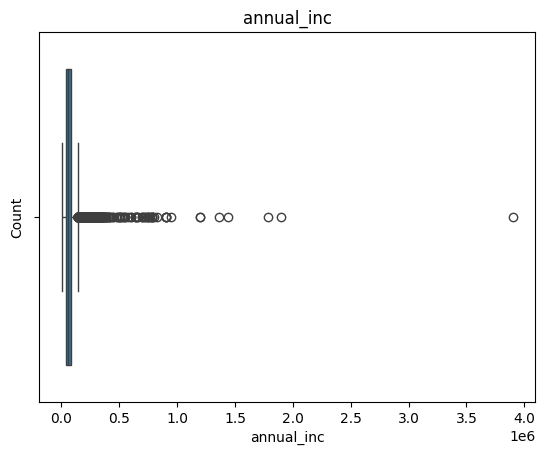

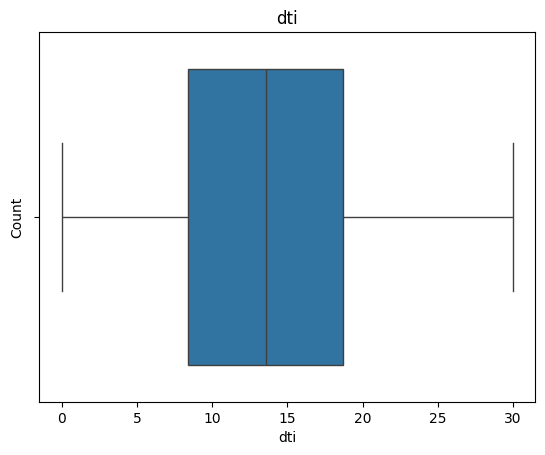

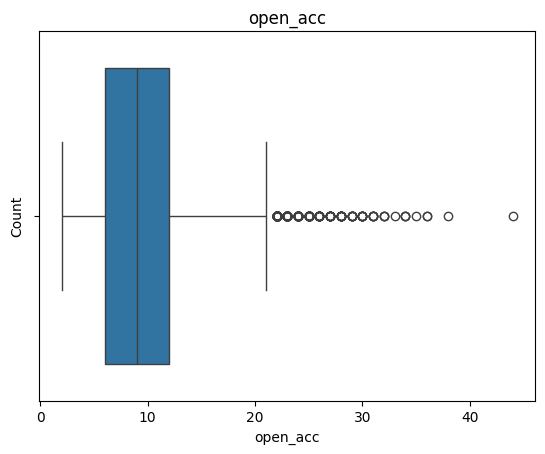

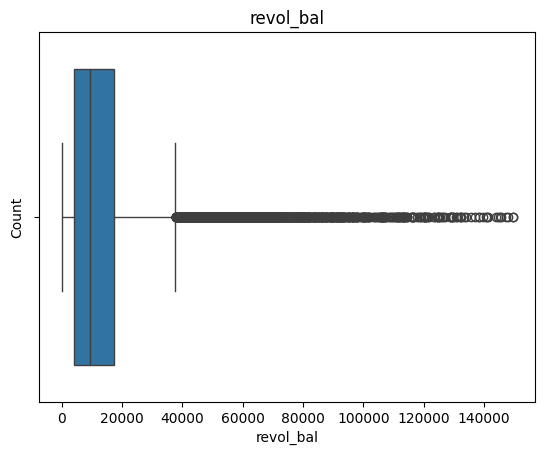

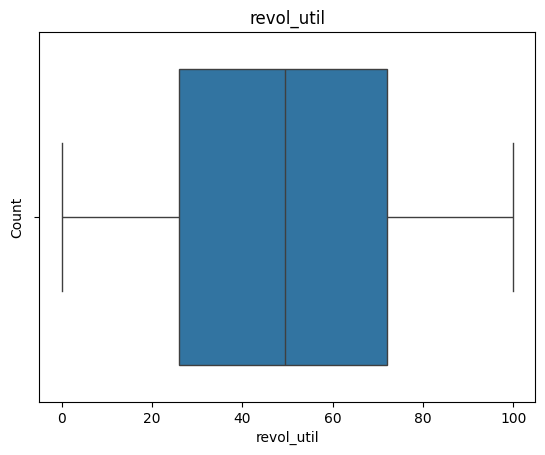

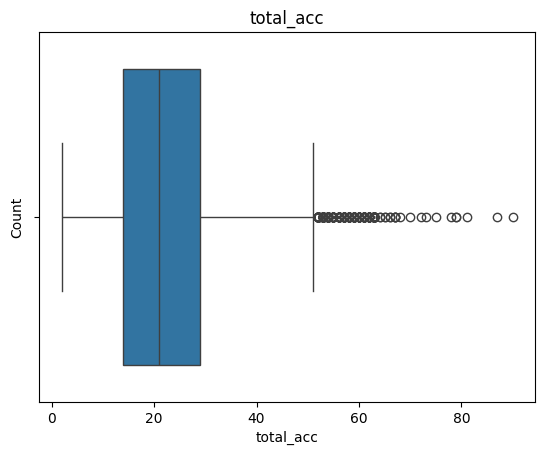

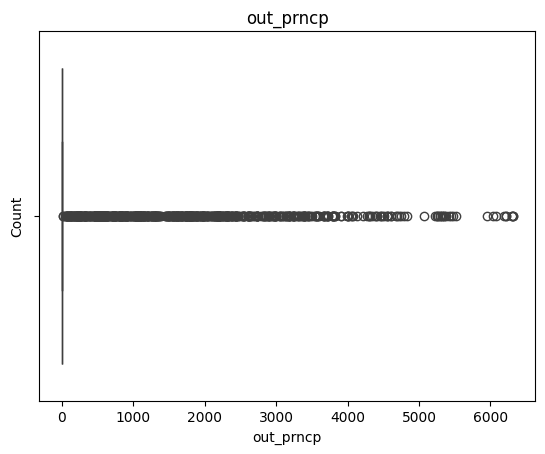

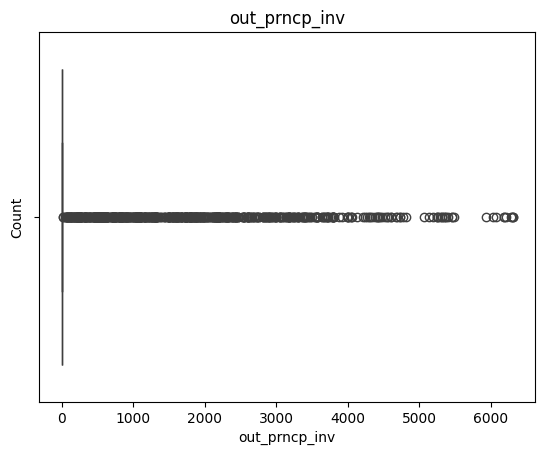

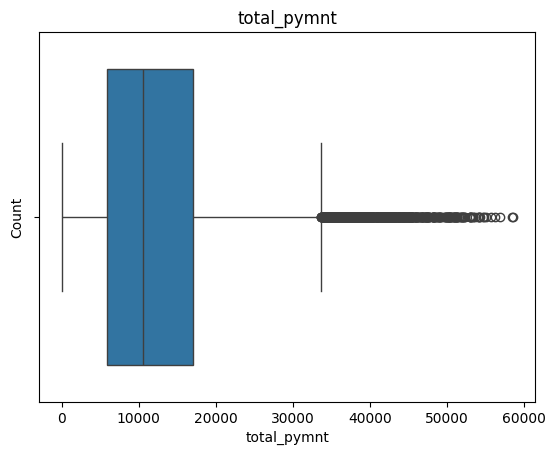

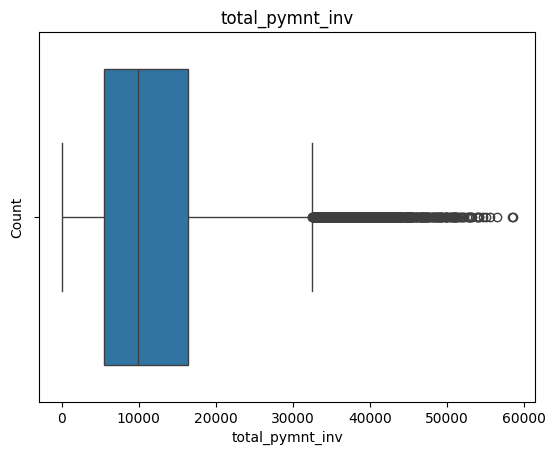

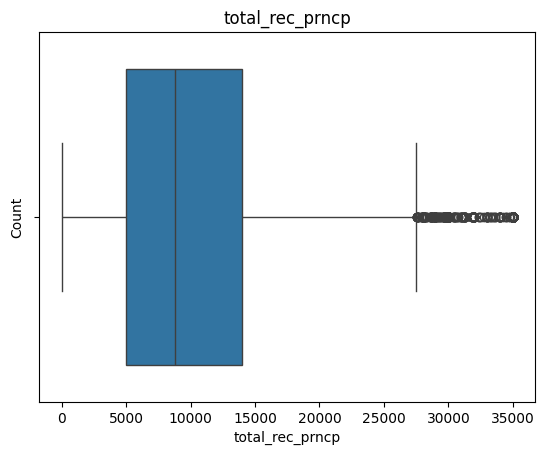

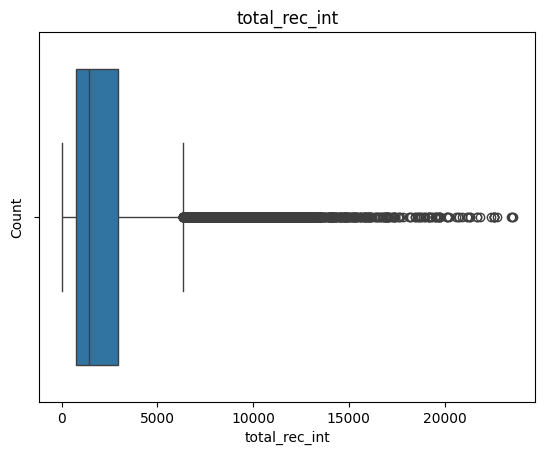

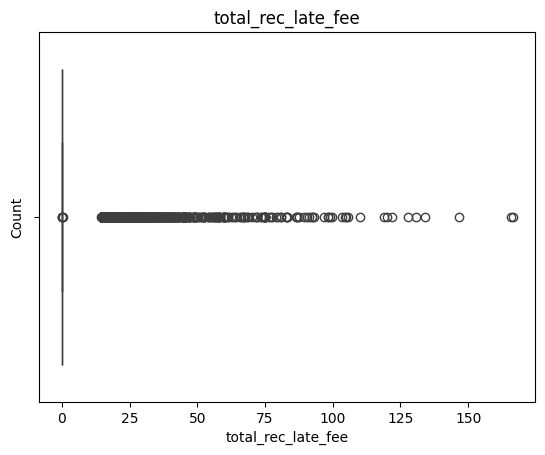

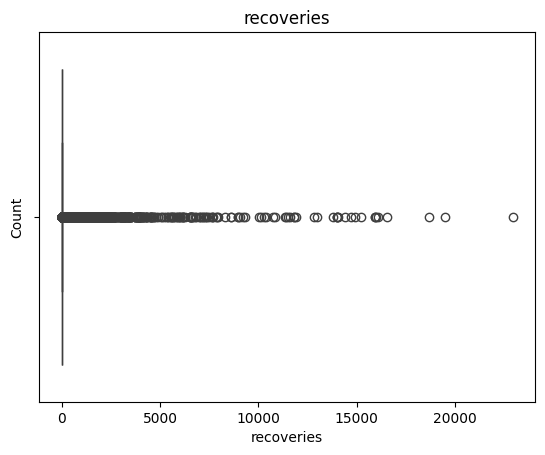

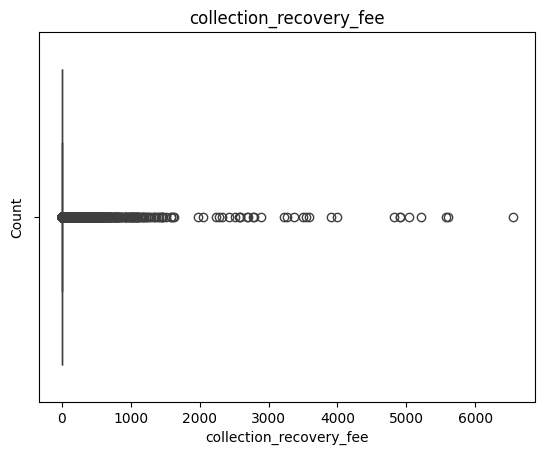

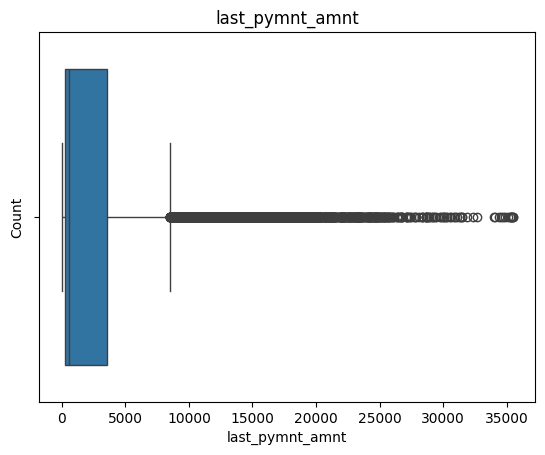

In [43]:
for feature in continuous_feature:
#     data=df.copy()
    sns.boxplot(data=df,x=data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

#### Key Takeaways:
We can observe the above graphs shows the box plots of all the continuou features. 

### Bivariate Ananlysis

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24404 entries, 1 to 39623
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          24404 non-null  int64  
 1   member_id                   24404 non-null  int64  
 2   loan_amnt                   24404 non-null  int64  
 3   funded_amnt                 24404 non-null  int64  
 4   funded_amnt_inv             24404 non-null  float64
 5   term                        24404 non-null  int64  
 6   int_rate                    24404 non-null  float64
 7   installment                 24404 non-null  float64
 8   grade                       24404 non-null  object 
 9   sub_grade                   24404 non-null  object 
 10  emp_title                   24404 non-null  object 
 11  emp_length                  24404 non-null  object 
 12  home_ownership              24404 non-null  object 
 13  annual_inc                  24404 no

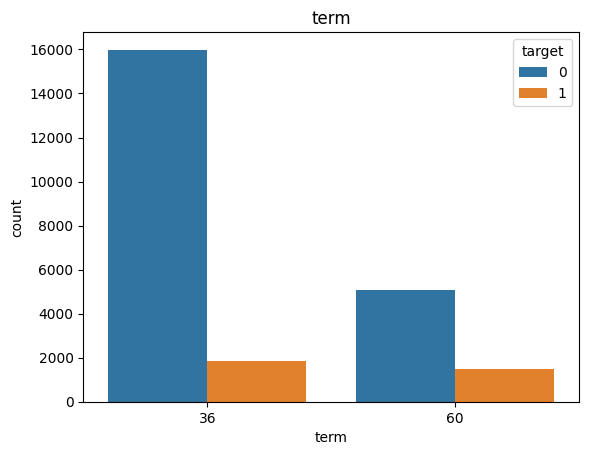

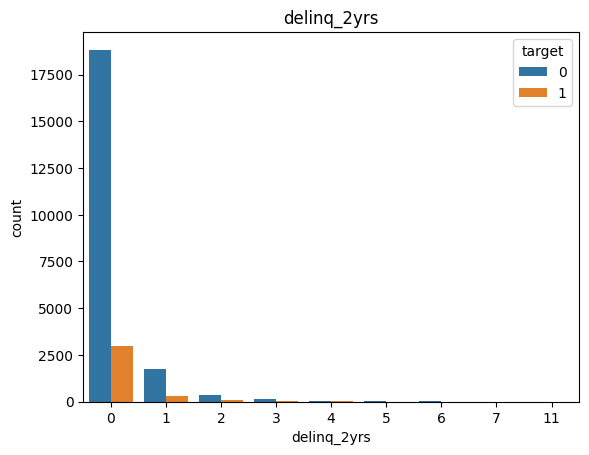

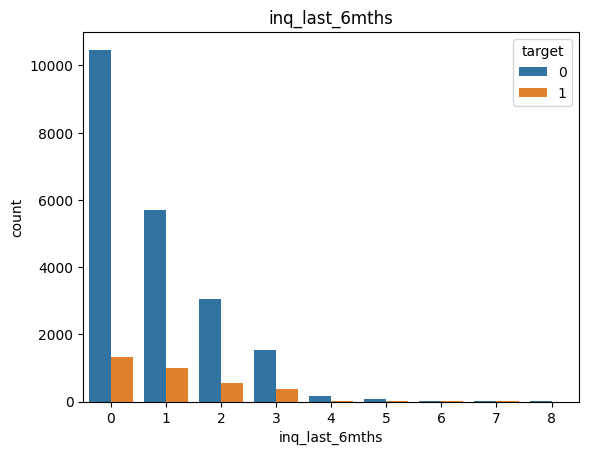

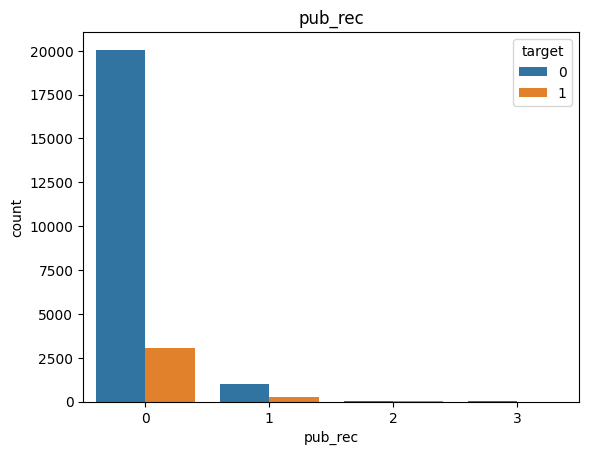

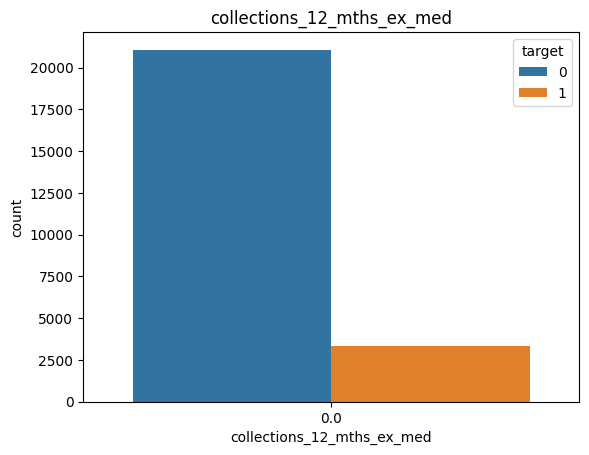

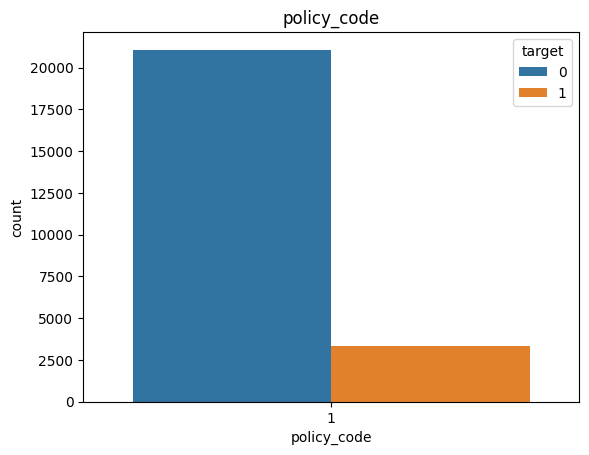

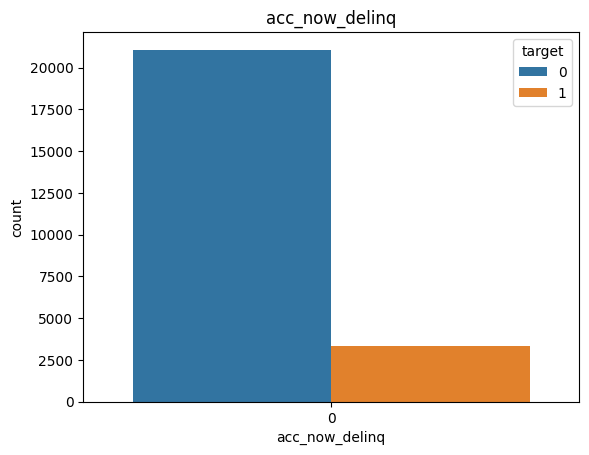

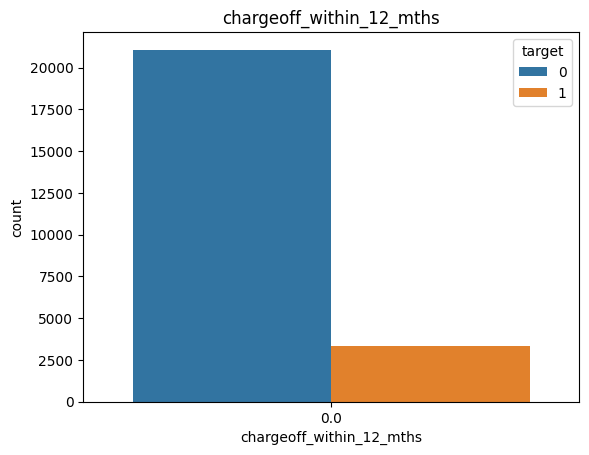

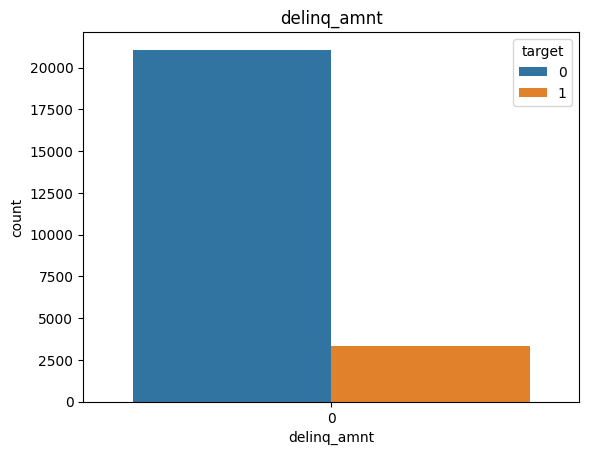

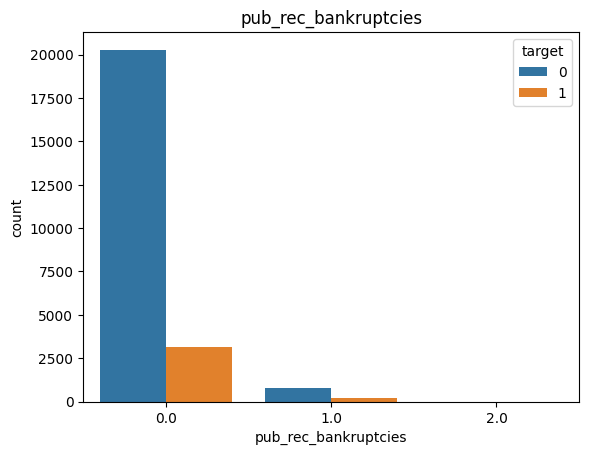

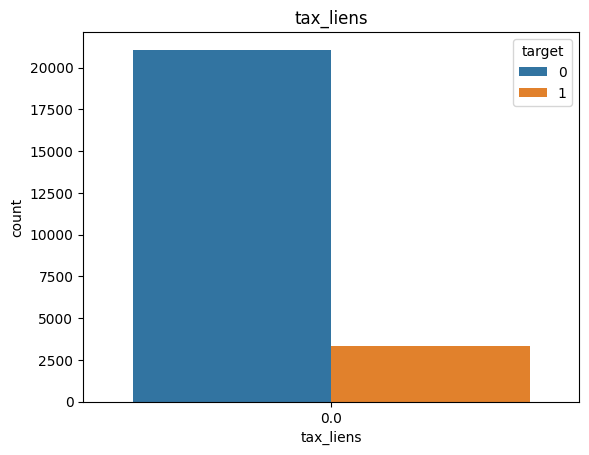

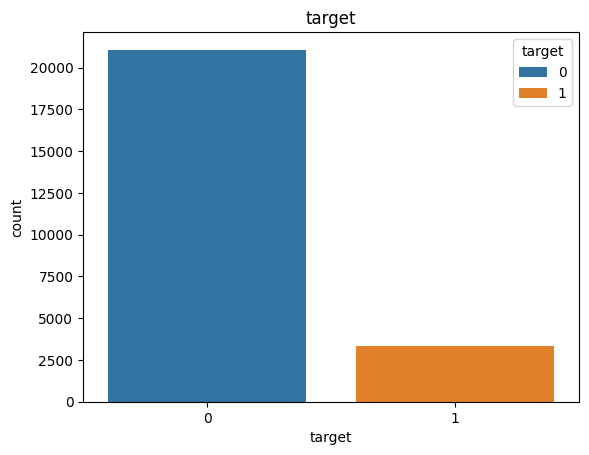

In [45]:
# sns.countplot(x='loan_amnt',hue='target',data=df)
for feature in discrete_feature:
    # data=df.copy()
    sns.countplot(data=df,x=df[feature],hue='target')
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

#### Key Takeaways:
We can observe the above graphs shows the count plots of all the discrete features with respect to the target column. 

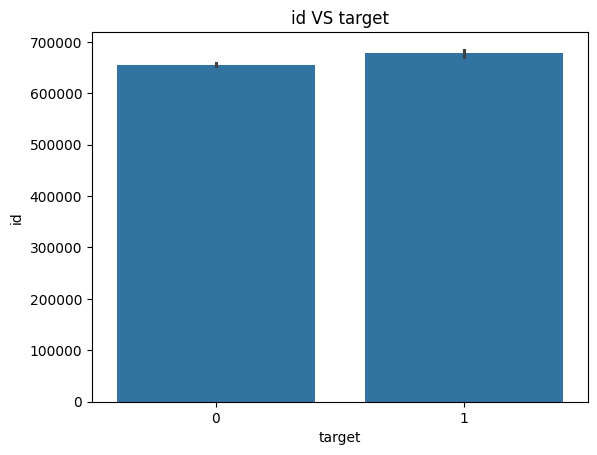

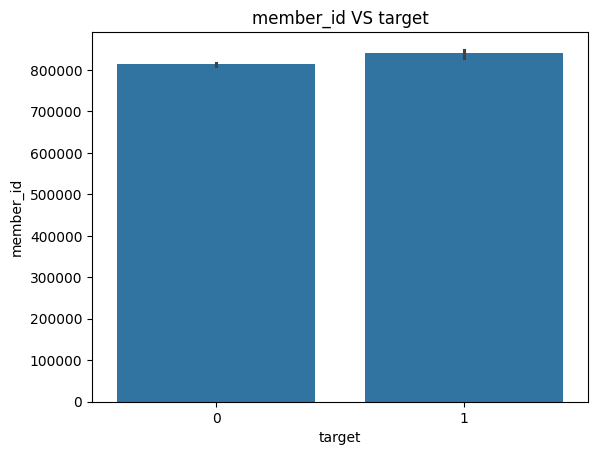

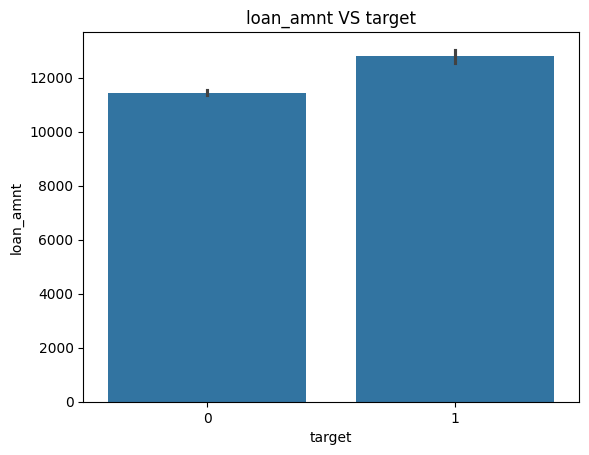

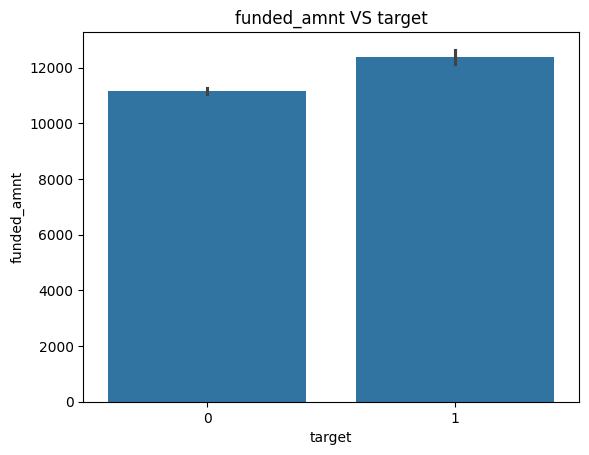

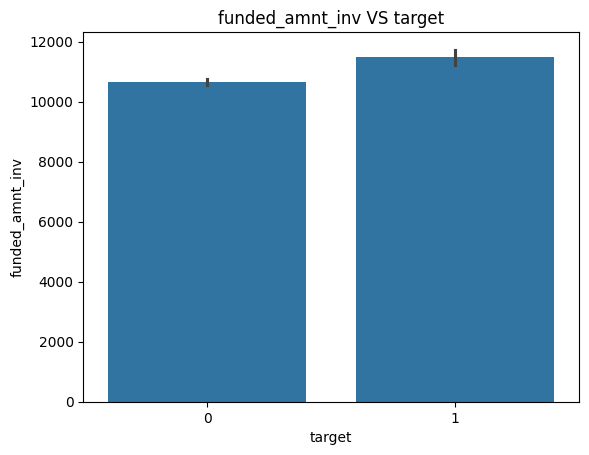

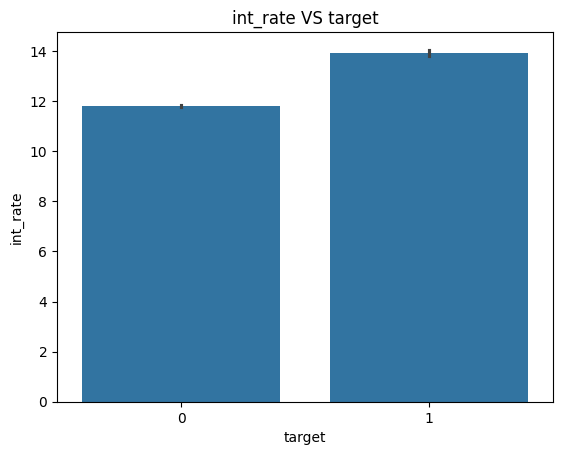

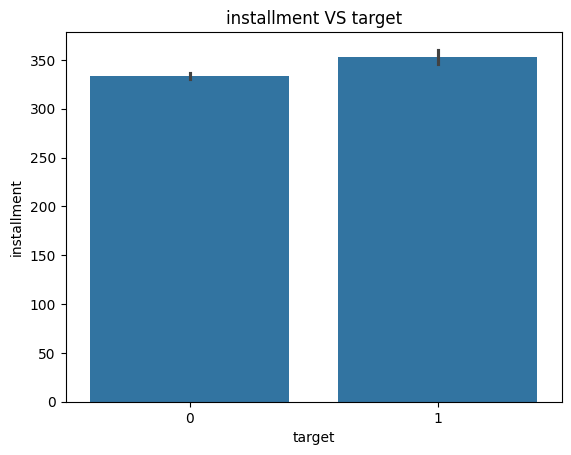

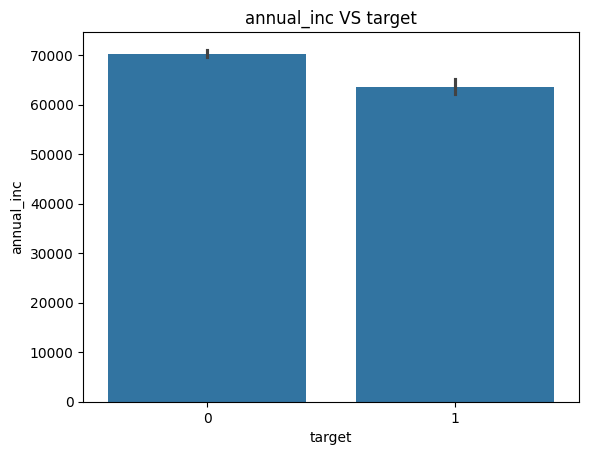

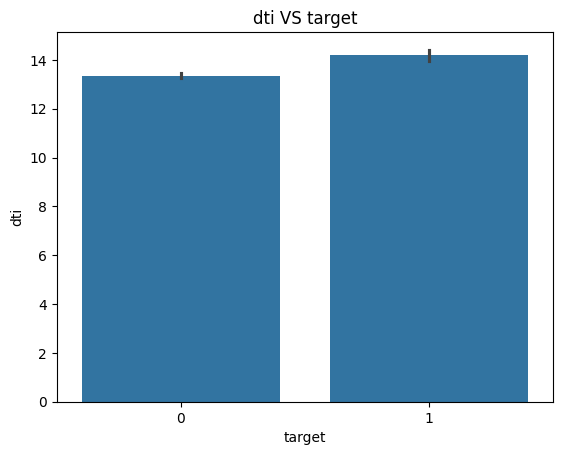

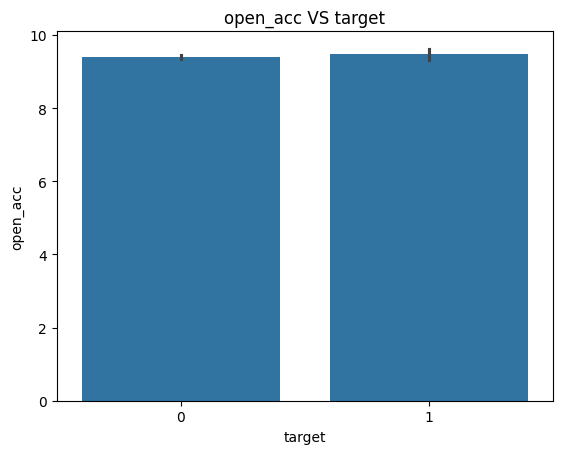

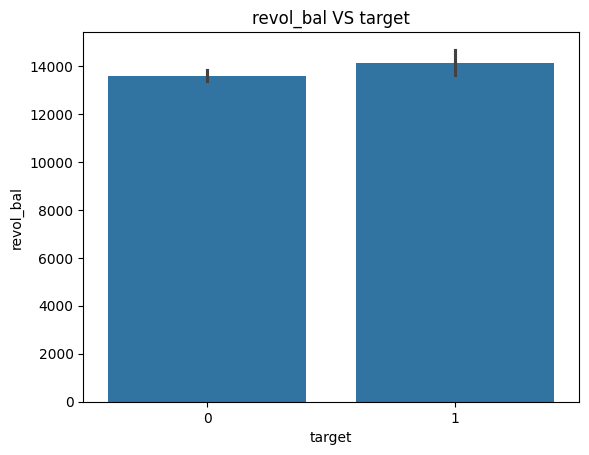

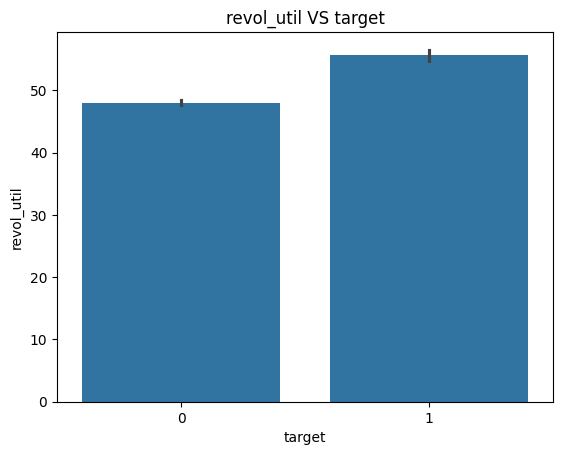

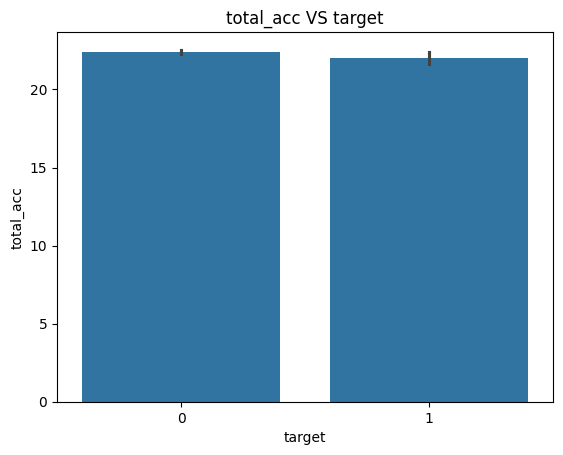

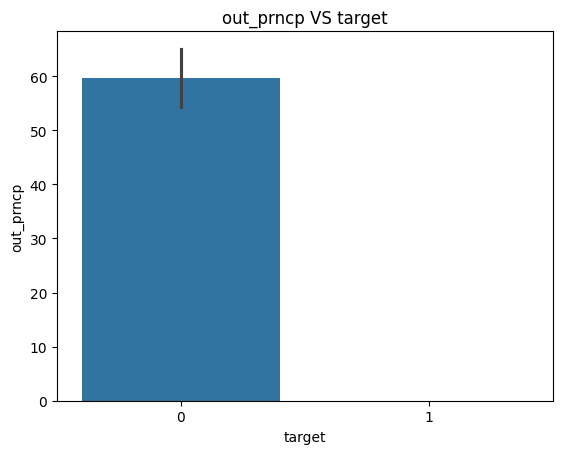

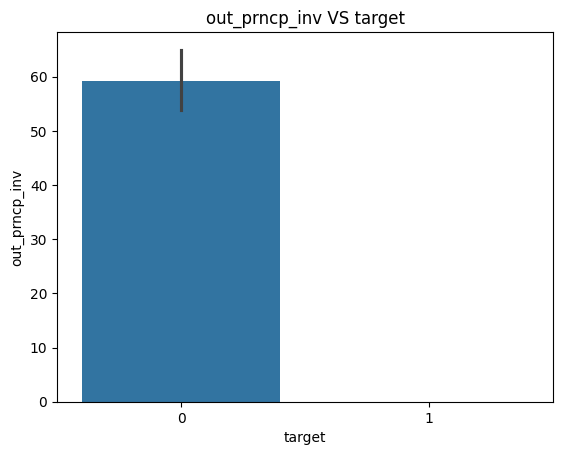

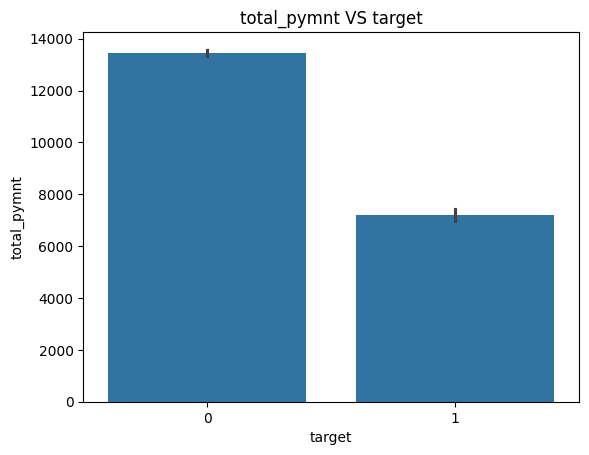

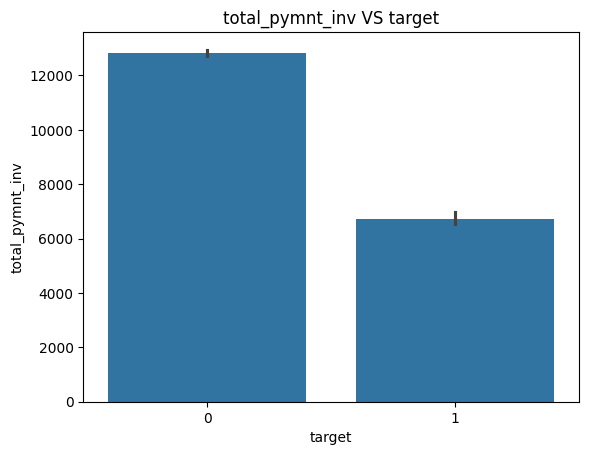

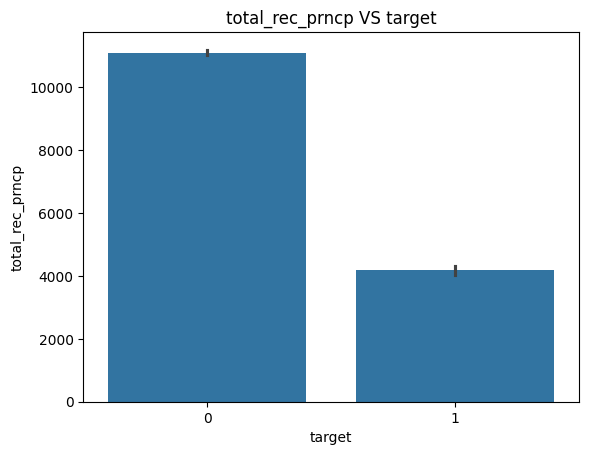

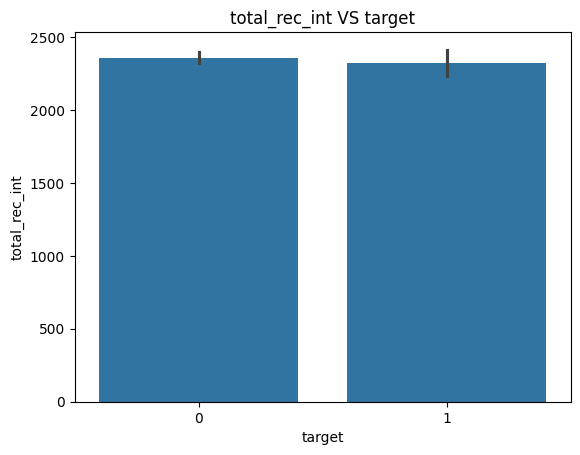

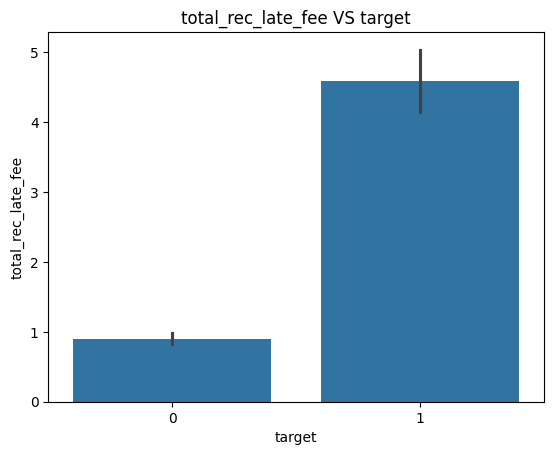

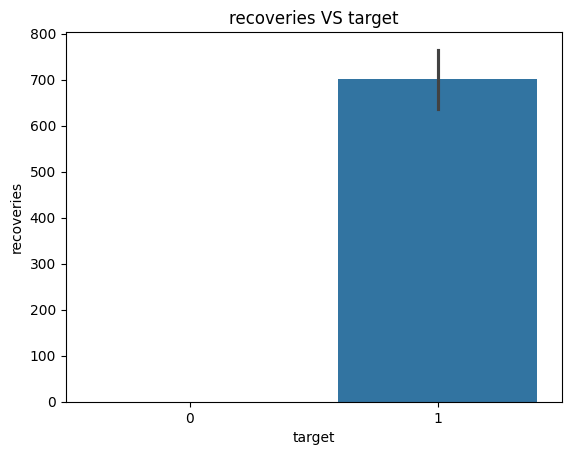

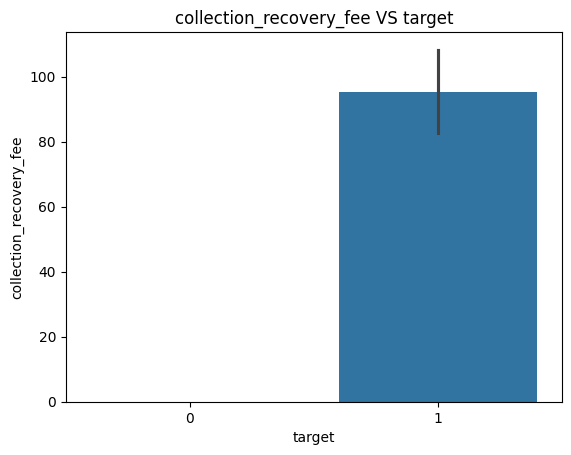

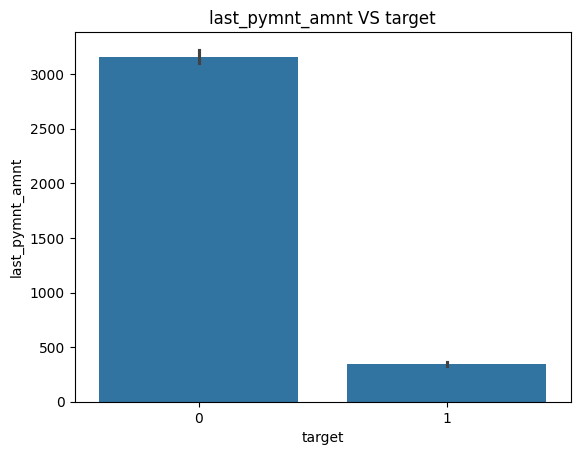

In [46]:
# sns.barplot(y='loan_amnt',x='target',data=df)
# plt.title("loan_amnt VS. target")
for feature in continuous_feature:
    data=df.copy()
    sns.barplot(y=feature,x='target',data=df)
    plt.title(feature+" VS target")
    plt.show()

#### Key Takeaways:
We can observe the above graphs shows the count plots of all the continuous features with respect to the target column. We can also observe that loan_amnt, funded_amnt, funded_amnt_inv, int_rate, installement, dti, revol_bal, revol_util, total_rec_late_fee, recoveries,& collection_recovery_fee has high defaulted values.

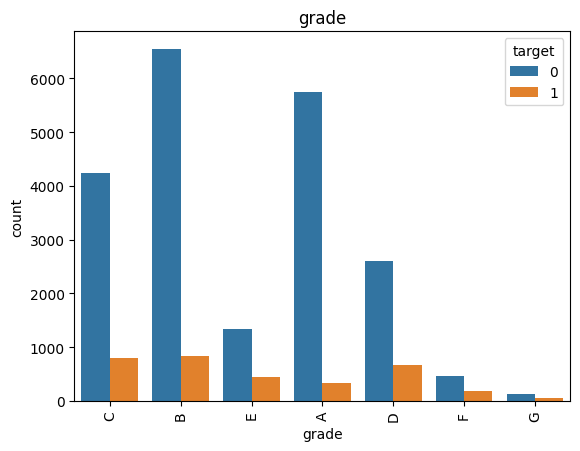

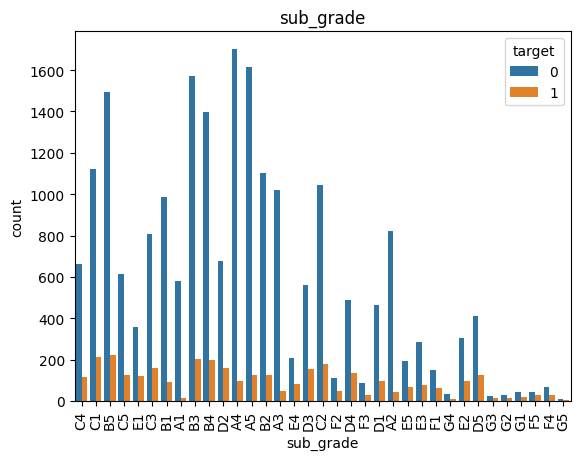

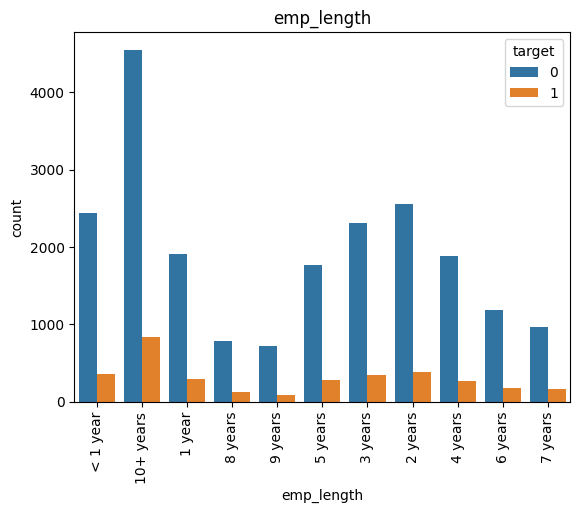

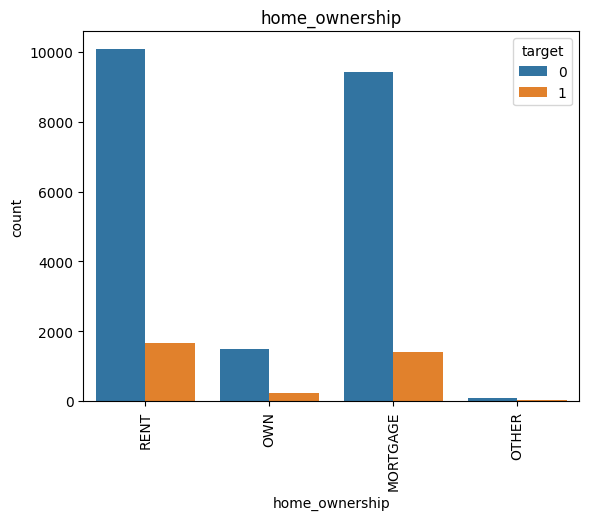

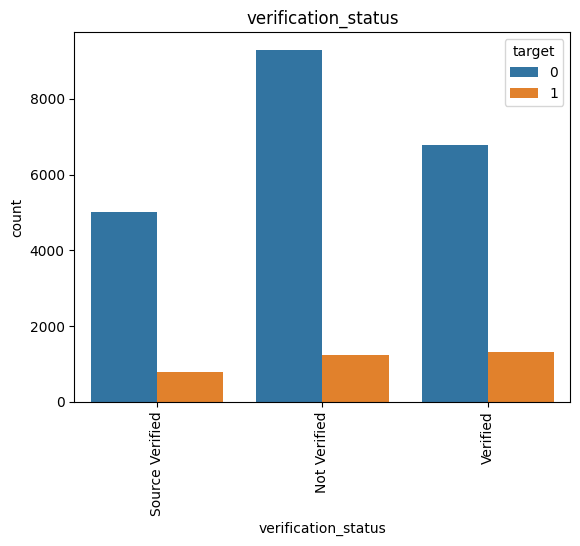

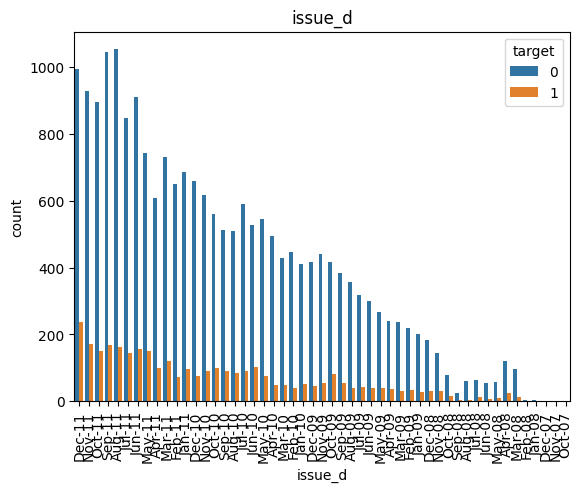

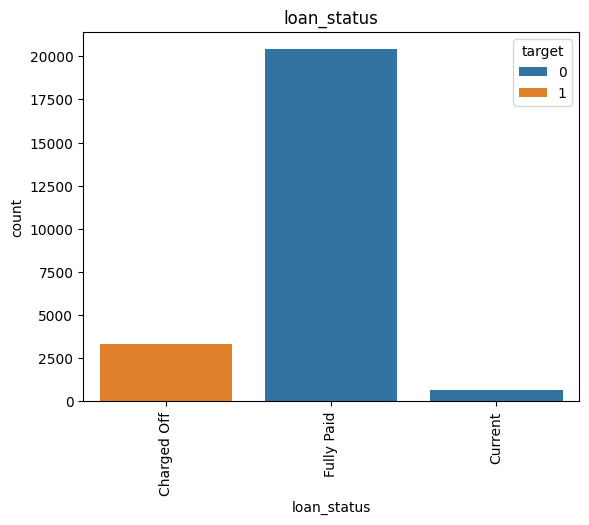

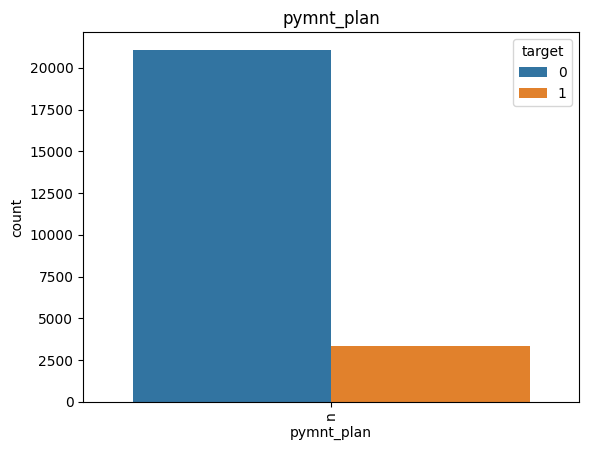

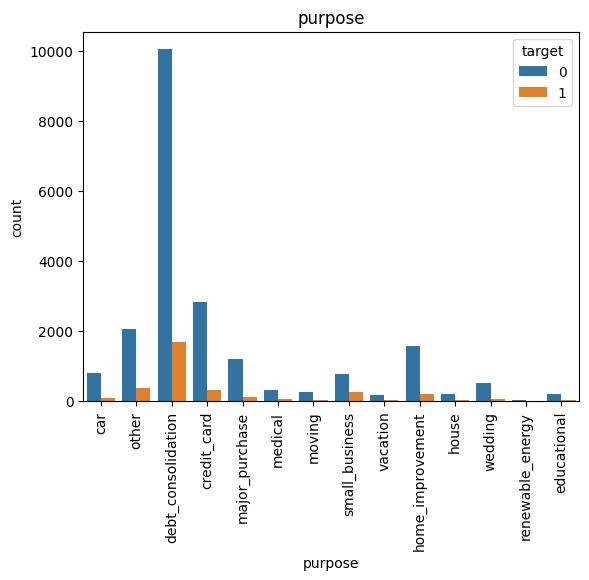

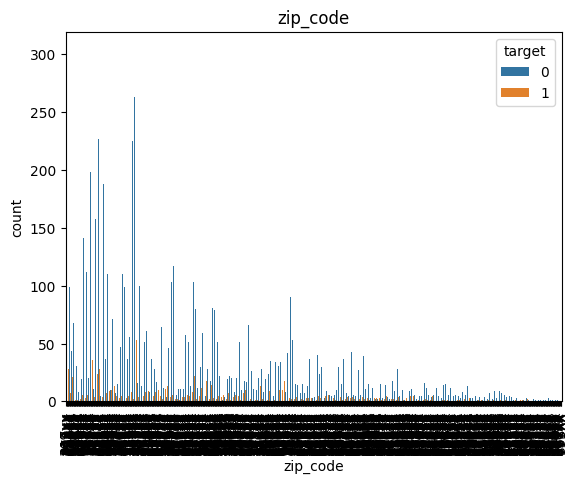

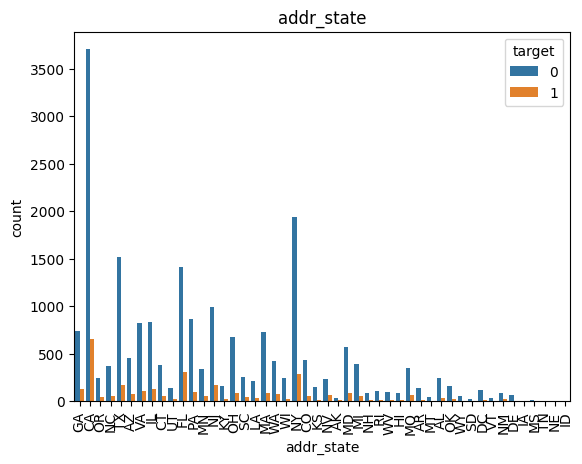

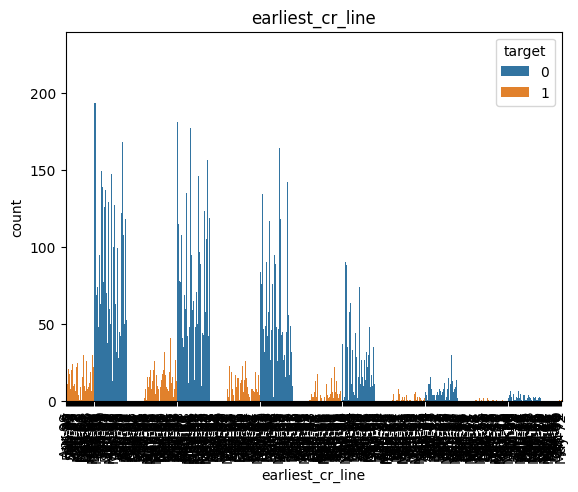

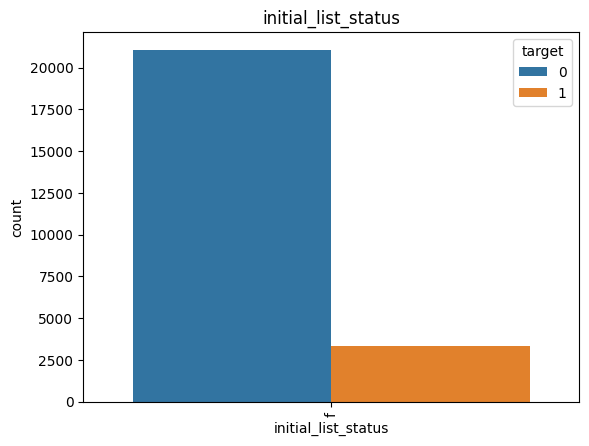

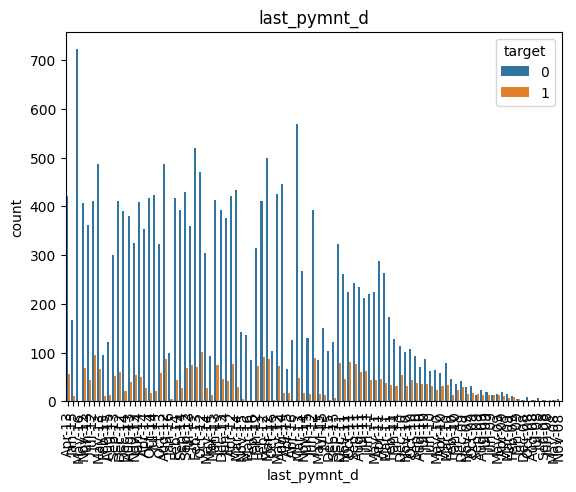

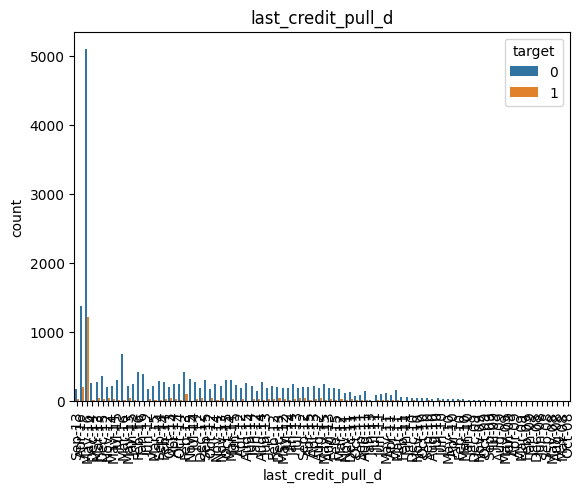

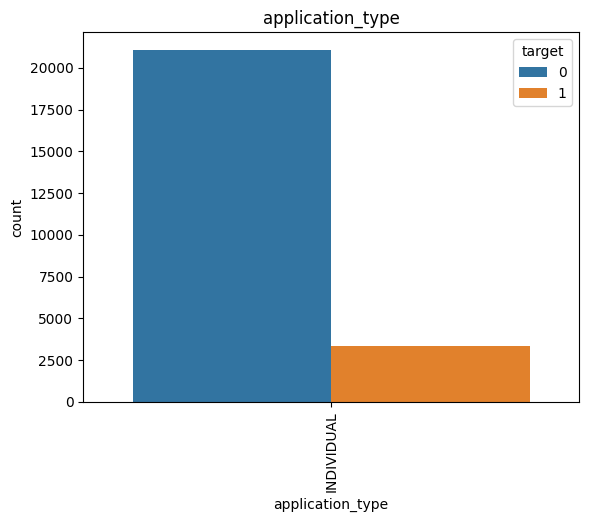

In [47]:
for feature in categorical_features:
    sns.countplot(data=df,x=data[feature],hue='target')
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.xticks(rotation=90)
    plt.title(feature)
    plt.show()

#### Key Takeaways:
We can observe the above graphs shows the count plots of all the categorical features with respect to the target column. We can also observe thatin grades geade C, B,D has more defalted vales than other, and in emp_length 10+ years has more defalted vales than other, and in home owership Rent & Mortgage has more defalted vales than other, and in purpose column debt_consolidation has more defalted vales than other and in add_state CA has more defalted vales than other.

/tmp/ipykernel_9681/4164940613.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "loan_status" , y = "loan_amnt", data = df, palette = "rainbow" )


<Axes: xlabel='loan_status', ylabel='loan_amnt'>

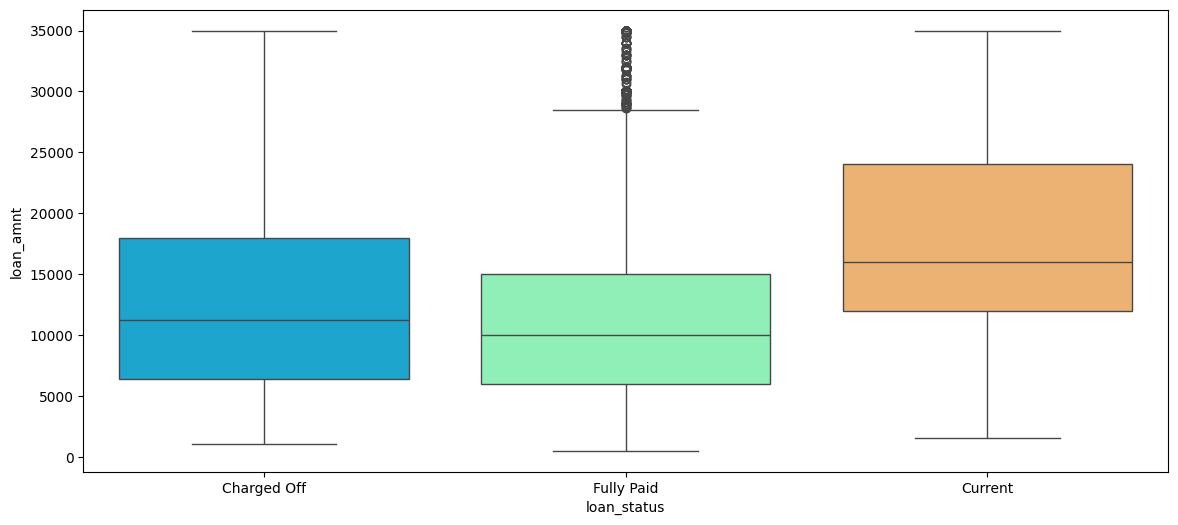

In [48]:
plt.figure(figsize=(14,6))
sns.boxplot(x = "loan_status" , y = "loan_amnt", data = df, palette = "rainbow" )

#### Key Takeaways:
No differentiation in Fully Paid and ChargeOff customers.

Current customers have on an average higher loan amount than fully paid and Charged off customers

/tmp/ipykernel_9681/2446276958.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "loan_status" , y = "annual_inc", data = df, palette = "rainbow" )


<Axes: xlabel='loan_status', ylabel='annual_inc'>

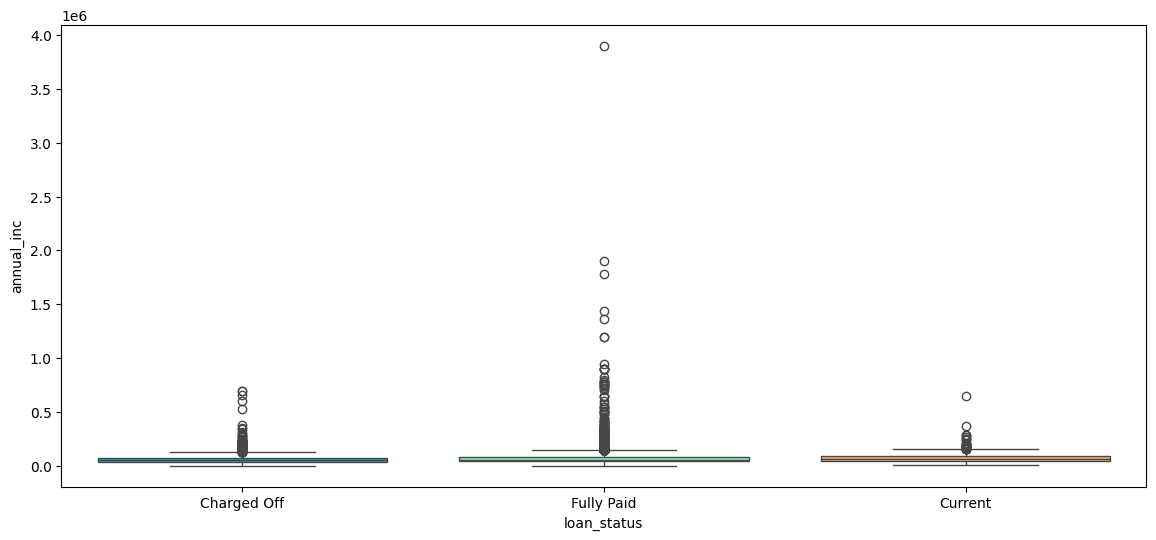

In [49]:
plt.figure(figsize=(14,6))
sns.boxplot(x = "loan_status" , y = "annual_inc", data = df, palette = "rainbow" )

#### Key Takeaways:
Fully Paid customers have higher income levels than charged off and current customers

/tmp/ipykernel_9681/3037646310.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "loan_status" , y = "annual_inc", data = df[df["annual_inc"]<=1000000], palette = "rainbow" )


<Axes: xlabel='loan_status', ylabel='annual_inc'>

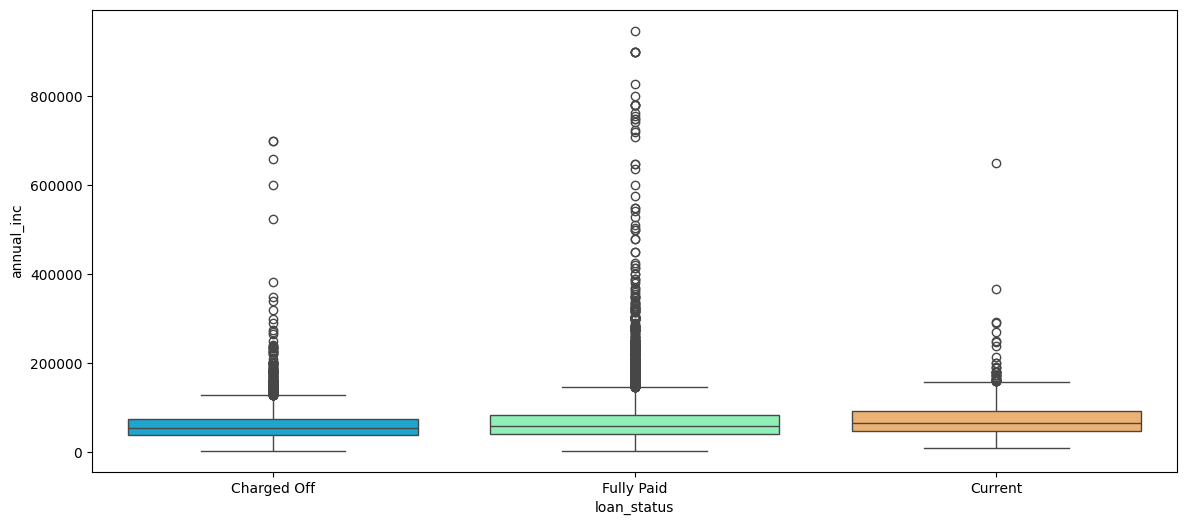

In [50]:
plt.figure(figsize=(14,6))
sns.boxplot(x = "loan_status" , y = "annual_inc", data = df[df["annual_inc"]<=1000000], palette = "rainbow" )

#### Key Takeaways:
Median incomes of all three catgories of customers are nearly similiar

However, Many Fully Paid customers have higher income levels than charged off and current customers

/tmp/ipykernel_9681/3205958657.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "loan_status" , y = "int_rate", data = df, palette = "rainbow" )


<Axes: xlabel='loan_status', ylabel='int_rate'>

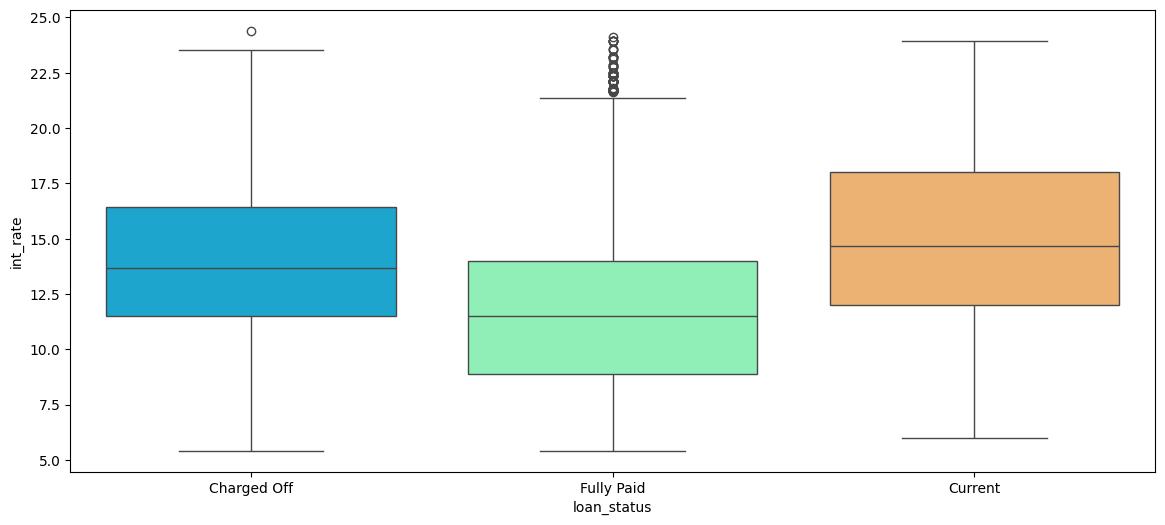

In [51]:
plt.figure(figsize=(14,6))
sns.boxplot(x = "loan_status" , y = "int_rate", data = df, palette = "rainbow" )

#### Key Takeaways:
Differentiation in intereset rates seen in all the three categories of customers in terms of Fully paid, Charged Off and current customers

Interest rates have increased from Fully paid, Charged Off and current customers

/tmp/ipykernel_9681/172298152.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "term" , y = "loan_amnt", data = df, palette = "rainbow" )


<Axes: xlabel='term', ylabel='loan_amnt'>

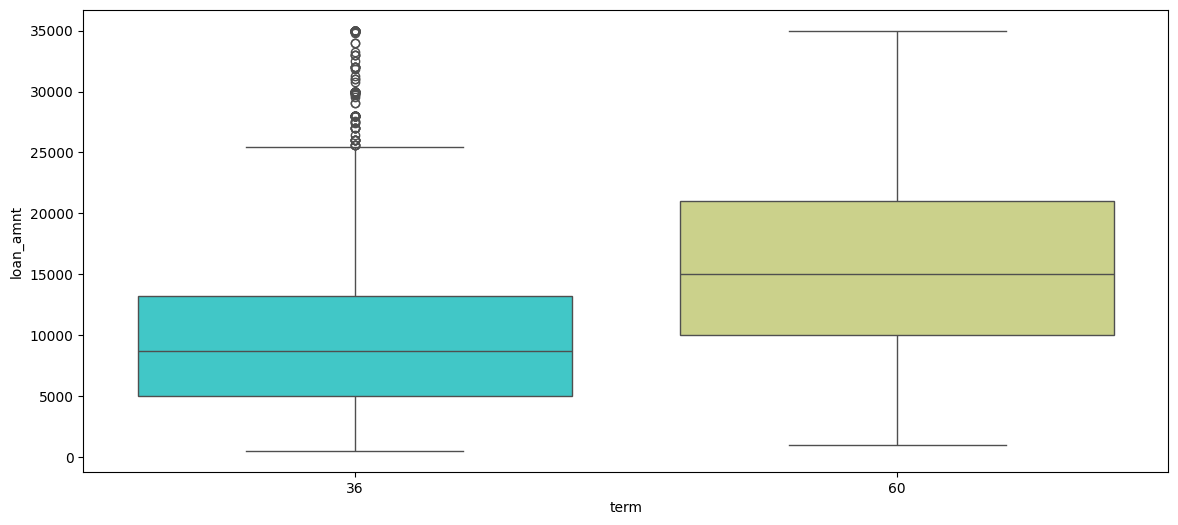

In [52]:
plt.figure(figsize=(14,6))
sns.boxplot(x = "term" , y = "loan_amnt", data = df, palette = "rainbow" )

#### Key Takeaways:
People take Higher Loan amount for long term loans and vice versa

i.e. Higher loan amount in 60 months loan tenure

/tmp/ipykernel_9681/573695717.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "loan_status" , y = "installment", data = df, palette = "rainbow" )


<Axes: xlabel='loan_status', ylabel='installment'>

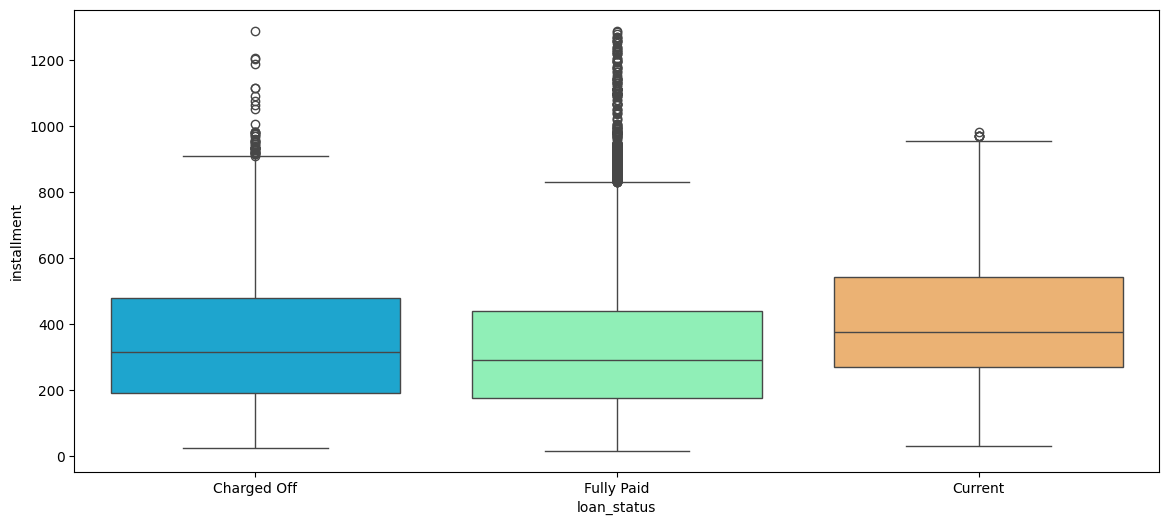

In [53]:
plt.figure(figsize=(14,6))
sns.boxplot(x = "loan_status" , y = "installment", data = df, palette = "rainbow" )

#### Key Takeaways:
Median incomes of all three catgories of customers are nearly similiar with increasing trend from fully paid to charged off and current customers

However, Many Fully Paid customers have higher installments than charged off and current customers

Current Customers have lower max value installments than charged off and fully paid customers

#### Pivot Table for Loan status vs Grade

In [54]:
pd.crosstab(df['loan_status'], df['grade'])

grade           A     B     C     D     E    F    G
loan_status                                        
Charged Off   328   840   791   672   444  194   59
Current        22   207   157   136   106   40   11
Fully Paid   5718  6341  4091  2470  1238  417  122

In [55]:
temp = pd.crosstab(df['loan_status'], df['grade'])
temp.values

array([[ 328,  840,  791,  672,  444,  194,   59],
       [  22,  207,  157,  136,  106,   40,   11],
       [5718, 6341, 4091, 2470, 1238,  417,  122]])

In [56]:
from scipy.stats import chi2_contingency
def dependence(data):
    stat, p, dof, expected = chi2_contingency(data)

    # H0: there is no relation between the variables. 
    # H1: there is a significant relationship between the two variables. 

    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0): : there is a significant relationship between the two variables')
    else:
        print('Independent (H0 holds true): : there is no relation between the variables')

    # Key Takeaways:
    # Since P value is less than 0.05 there is a significant relationship between Loan status and Grade

In [57]:
dependence(temp)

p value is 3.090188600669939e-257
Dependent (reject H0): : there is a significant relationship between the two variables


In [58]:
temp = pd.crosstab(df['purpose'], df['loan_status'])
temp

loan_status         Charged Off  Current  Fully Paid
purpose                                             
car                          80       25         789
credit_card                 325       61        2773
debt_consolidation         1682      349        9692
educational                  41        0         205
home_improvement            197       64        1520
house                        38        8         209
major_purchase              127       25        1186
medical                      65        8         324
moving                       40        2         268
other                       373       78        1975
renewable_energy             11        1          47
small_business              260       44         730
vacation                     27        3         162
wedding                      62       11         517

In [59]:
dependence(temp)

p value is 4.2013382936374026e-42
Dependent (reject H0): : there is a significant relationship between the two variables


In [60]:
######################## Home Ownership with charge off (Bivariate Analysis)
pd.crosstab(df['loan_status'], df['home_ownership'])

home_ownership  MORTGAGE  OTHER   OWN  RENT
loan_status                                
Charged Off         1409     18   233  1668
Current              391      0    44   244
Fully Paid          9044     76  1439  9838

In [61]:

######################## addr_state with charge off (Bivariate Analysis)
pd.crosstab(df['loan_status'], df['addr_state'])

addr_state   AK   AL   AR   AZ    CA   CO   CT   DC  DE    FL  ...  SD  TN  \
loan_status                                                    ...           
Charged Off  12   33   19   74   654   61   60   12   6   304  ...   7   2   
Current       0   13    5   17    85   19   17    2   1    48  ...   1   0   
Fully Paid   40  228  131  442  3618  415  364  119  66  1365  ...  21   7   

addr_state     TX   UT   VA  VT   WA   WI  WV  WY  
loan_status                                        
Charged Off   173   26  111   3   80   26  14   3  
Current        44    5   23   0   16   10   2   1  
Fully Paid   1478  135  802  31  409  234  96  54  

[3 rows x 48 columns]

/tmp/ipykernel_9681/35554315.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "loan_status" , y = "dti", data = df, palette = "rainbow" )


<Axes: xlabel='loan_status', ylabel='dti'>

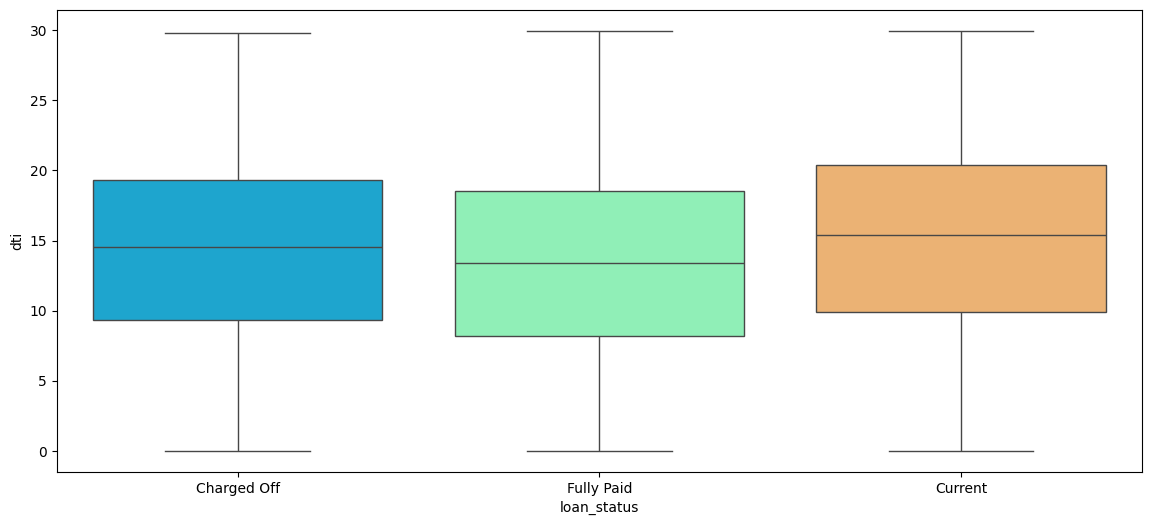

In [62]:
plt.figure(figsize=(14,6))
sns.boxplot(x = "loan_status" , y = "dti", data = df, palette = "rainbow" )

#### Key Takeaways:
No Differentiation seen in loan status with the debt to income ratio from the boc plot

In [63]:
pd.crosstab(df['loan_status'], df['inq_last_6mths'])

inq_last_6mths      0     1     2     3    4   5   6   7  8
loan_status                                                
Charged Off      1339   997   552   380   26  16  11   7  0
Current           358   182    92    38    6   0   1   1  1
Fully Paid      10115  5529  2960  1501  161  73  29  22  7

In [64]:
temp = pd.crosstab(df['loan_status'], df['inq_last_6mths'])
dependence(temp)

p value is 2.2354974881972976e-24
Dependent (reject H0): : there is a significant relationship between the two variables


In [65]:
tmp = df[df['loan_status'].isin(["Charged Off"])].purpose.value_counts(normalize=True).reset_index()
tmp

purpose  proportion
0   debt_consolidation    0.505409
1                other    0.112079
2          credit_card    0.097656
3       small_business    0.078125
4     home_improvement    0.059195
5       major_purchase    0.038161
6                  car    0.024038
7              medical    0.019531
8              wedding    0.018630
9          educational    0.012320
10              moving    0.012019
11               house    0.011418
12            vacation    0.008113
13    renewable_energy    0.003305

In [66]:
pd.crosstab(df['purpose'], df['loan_status'])

loan_status         Charged Off  Current  Fully Paid
purpose                                             
car                          80       25         789
credit_card                 325       61        2773
debt_consolidation         1682      349        9692
educational                  41        0         205
home_improvement            197       64        1520
house                        38        8         209
major_purchase              127       25        1186
medical                      65        8         324
moving                       40        2         268
other                       373       78        1975
renewable_energy             11        1          47
small_business              260       44         730
vacation                     27        3         162
wedding                      62       11         517

In [67]:
temp = pd.crosstab(df['purpose'], df['loan_status']).reset_index()
temp

loan_status             purpose  Charged Off  Current  Fully Paid
0                           car           80       25         789
1                   credit_card          325       61        2773
2            debt_consolidation         1682      349        9692
3                   educational           41        0         205
4              home_improvement          197       64        1520
5                         house           38        8         209
6                major_purchase          127       25        1186
7                       medical           65        8         324
8                        moving           40        2         268
9                         other          373       78        1975
10             renewable_energy           11        1          47
11               small_business          260       44         730
12                     vacation           27        3         162
13                      wedding           62       11         517

In [68]:
temp["Charged Off %"] = 100*temp["Charged Off"]/temp["Charged Off"].sum()
temp.sort_values(by=["Charged Off %"], ascending=False)

loan_status             purpose  Charged Off  Current  Fully Paid  \
2            debt_consolidation         1682      349        9692   
9                         other          373       78        1975   
1                   credit_card          325       61        2773   
11               small_business          260       44         730   
4              home_improvement          197       64        1520   
6                major_purchase          127       25        1186   
0                           car           80       25         789   
7                       medical           65        8         324   
13                      wedding           62       11         517   
3                   educational           41        0         205   
8                        moving           40        2         268   
5                         house           38        8         209   
12                     vacation           27        3         162   
10             renewable_energy           11        1          47   

loan_status  Charged Off %  
2                50.540865  
9                11.207933  
1                 9.765625  
11                7.812500  
4                 5.919471  
6                 3.816106  
0                 2.403846  
7                 1.953125  
13                1.862981  
3                 1.231971  
8                 1.201923  
5                 1.141827  
12                0.811298  
10                0.330529

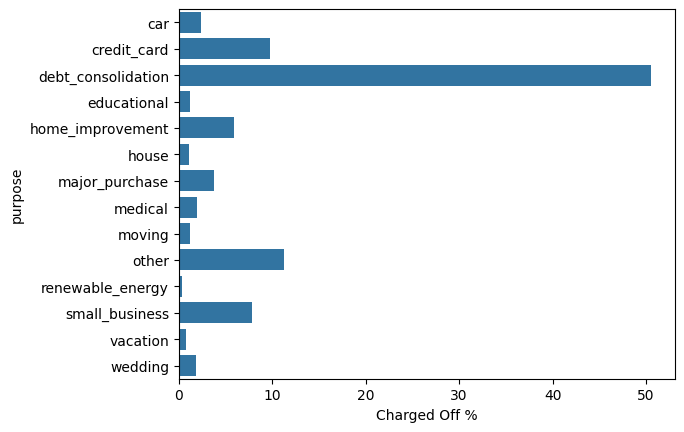

In [69]:
sns.barplot(x="Charged Off %", y="purpose",data=temp)
plt.show()

#### Key Takeaways:
Almost 49% loan are charged off when taken for the purpose of debt consolidation which is very high

In [70]:
################################## Segmenting Annual Income into different buckets based on its distribution

col = "annual_inc"
conditions = [(df[col]<10000),
              (df[col]<30000)&(df[col]>=10000),
              (df[col]<45000)&(df[col]>=30000),
              (df[col]<60000)&(df[col]>=45000),
              (df[col]<75000)&(df[col]>=60000),
              (df[col]<100000)&(df[col]>=75000),
              (df[col]<200000)&(df[col]>=100000),
              (df[col]>=200000)
             ]
choices = [ '0-10k',
            '10k-30',
            '30-45',
            '45-60',
            '60-75',
            '75-100',
            '100-200',
            '200 and above']
df["annual_inc_bucket"] = np.select(conditions, choices, default='60-75')

In [71]:
df[["annual_inc_bucket", "annual_inc"]].head()

annual_inc_bucket  annual_inc
1             30-45     30000.0
3             45-60     49200.0
4            75-100     80000.0
6             45-60     47004.0
7             45-60     48000.0

In [72]:
df["annual_inc_bucket"].value_counts()

annual_inc_bucket
45-60            5066
30-45            4884
60-75            4419
75-100           4205
100-200          3386
10k-30           2013
200 and above     404
0-10k              27
Name: count, dtype: int64

In [73]:
choices = [ '0-10k',
            '10k-30',
            '30-45',
            '45-60',
            '60-75',
            '75-100',
            '100-200',
            '200 and above']
df["annual_inc_bucket"] = df["annual_inc_bucket"].astype(pd.CategoricalDtype(choices , ordered=True))

/tmp/ipykernel_9681/3712329376.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "annual_inc_bucket" , y = "installment", data = df, palette = "rainbow" )


<Axes: xlabel='annual_inc_bucket', ylabel='installment'>

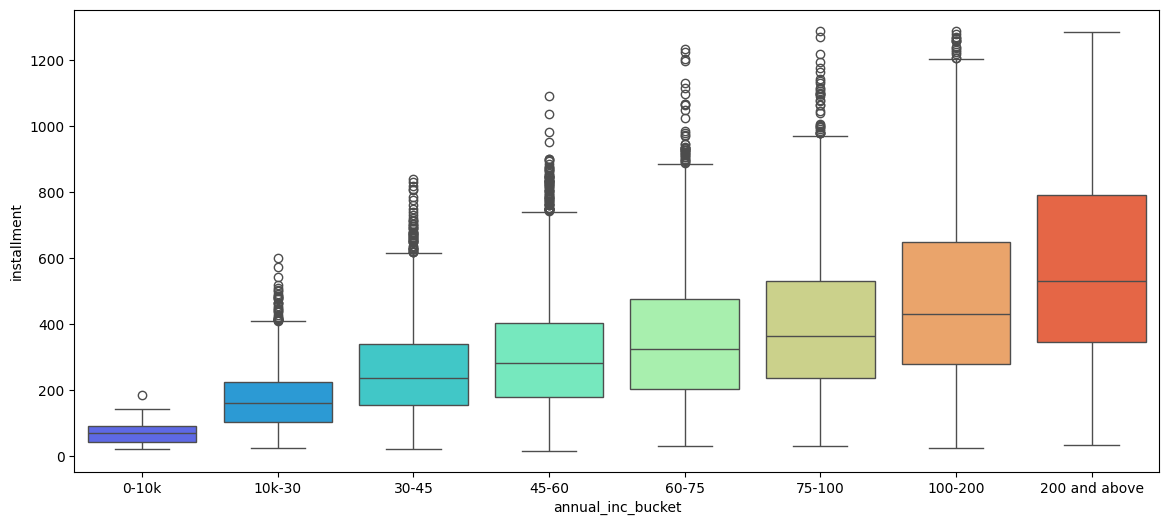

In [74]:
##################### annual_inc_bucket vs installment (Bivariate Analysis)
plt.figure(figsize=(14,6))
sns.boxplot(x = "annual_inc_bucket" , y = "installment", data = df, palette = "rainbow" )



#### Key Takeaways:
As income segment increses installmet also increses

/tmp/ipykernel_9681/30936627.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "annual_inc_bucket" , y = "loan_amnt", data = df, palette = "rainbow" )


<Axes: xlabel='annual_inc_bucket', ylabel='loan_amnt'>

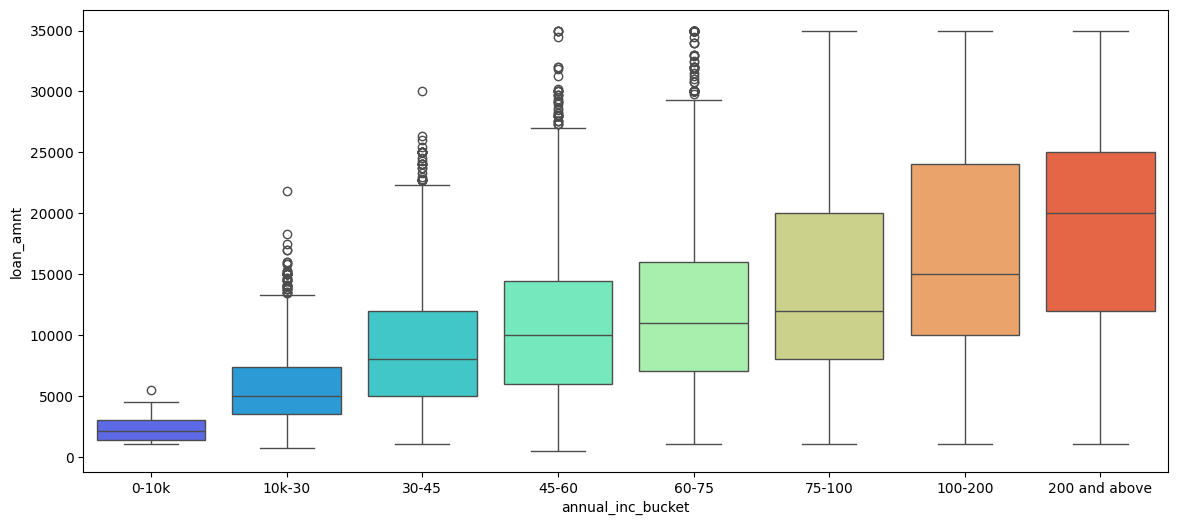

In [75]:

plt.figure(figsize=(14,6))
sns.boxplot(x = "annual_inc_bucket" , y = "loan_amnt", data = df, palette = "rainbow" )



#### Key Takeaways:
As income segment increses loan amount also increses

/tmp/ipykernel_9681/2734881478.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "annual_inc_bucket" , y = "int_rate", data = df, palette = "rainbow" )


<Axes: xlabel='annual_inc_bucket', ylabel='int_rate'>

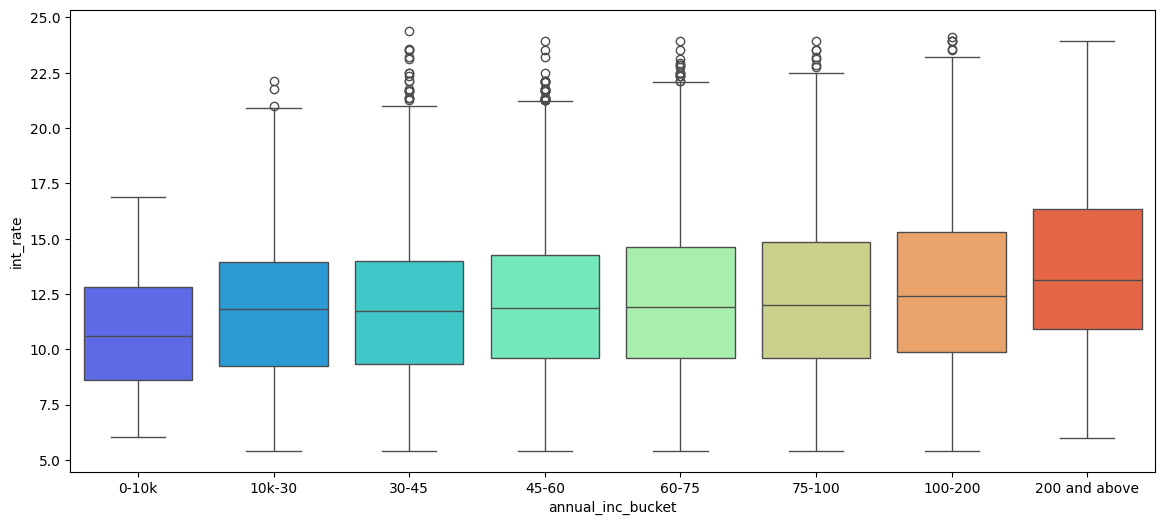

In [76]:

plt.figure(figsize=(14,6))
sns.boxplot(x = "annual_inc_bucket" , y = "int_rate", data = df, palette = "rainbow" )



#### Key Takeaways:
NO major differentiation seen in intereset rates with incoem segment

however, As income segment increses intereset rates increses very slightly 

/tmp/ipykernel_9681/831761231.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "annual_inc_bucket" , y = "dti", data = df, palette = "rainbow" )


<Axes: xlabel='annual_inc_bucket', ylabel='dti'>

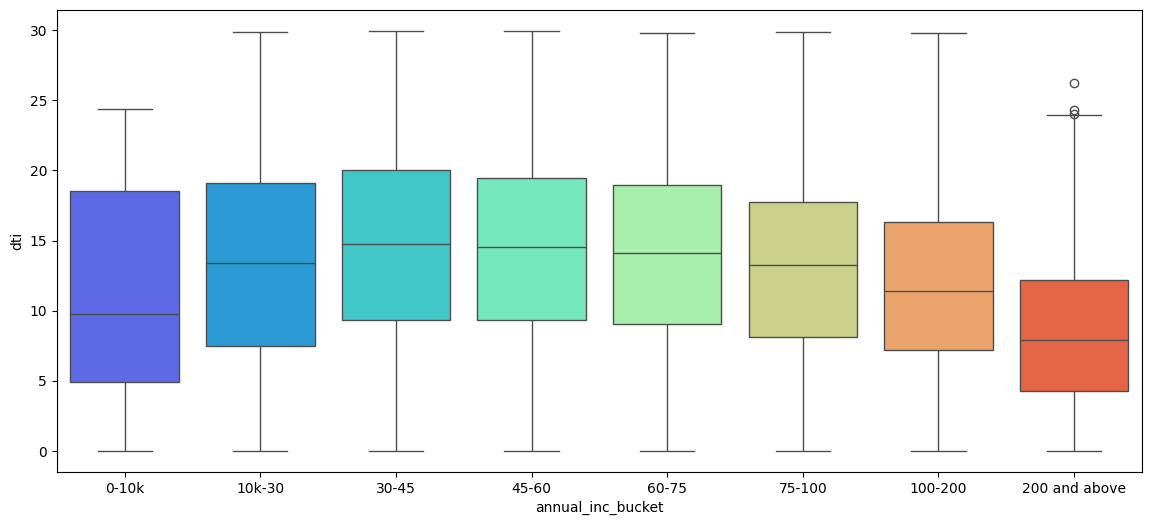

In [77]:

plt.figure(figsize=(14,6))
sns.boxplot(x = "annual_inc_bucket" , y = "dti", data = df, palette = "rainbow" )



#### Key Takeaways:
Low income and very high income segments have low dti as compared to medium income segments

/tmp/ipykernel_9681/106545148.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "grade" , y = "int_rate", data = df, palette = "rainbow" )


<Axes: xlabel='grade', ylabel='int_rate'>

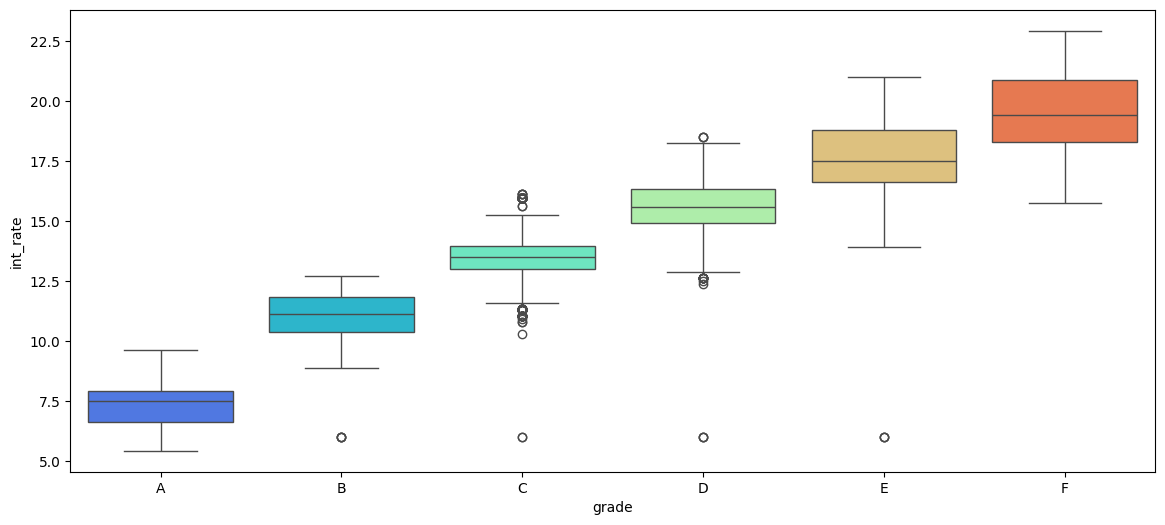

In [78]:
ordered_list = ['A', 'B', 'C', 'D', 'E', 'F']
df['grade'] = df['grade'].astype(pd.CategoricalDtype(ordered_list , ordered=True))
##################### grade vs interest Rate (Bivariate Analysis)
plt.figure(figsize=(14,6))
sns.boxplot(x = "grade" , y = "int_rate", data = df, palette = "rainbow" )



#### Key Takeaways:
As grade changes from A to B and finally to F interest rates significantly increases

This means F are more risky customers as compares to A

Customers interest rates increses from grade A to F

/tmp/ipykernel_9681/901627877.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "annual_inc_bucket" , y = "revol_bal", data = df, palette = "rainbow" )


<Axes: xlabel='annual_inc_bucket', ylabel='revol_bal'>

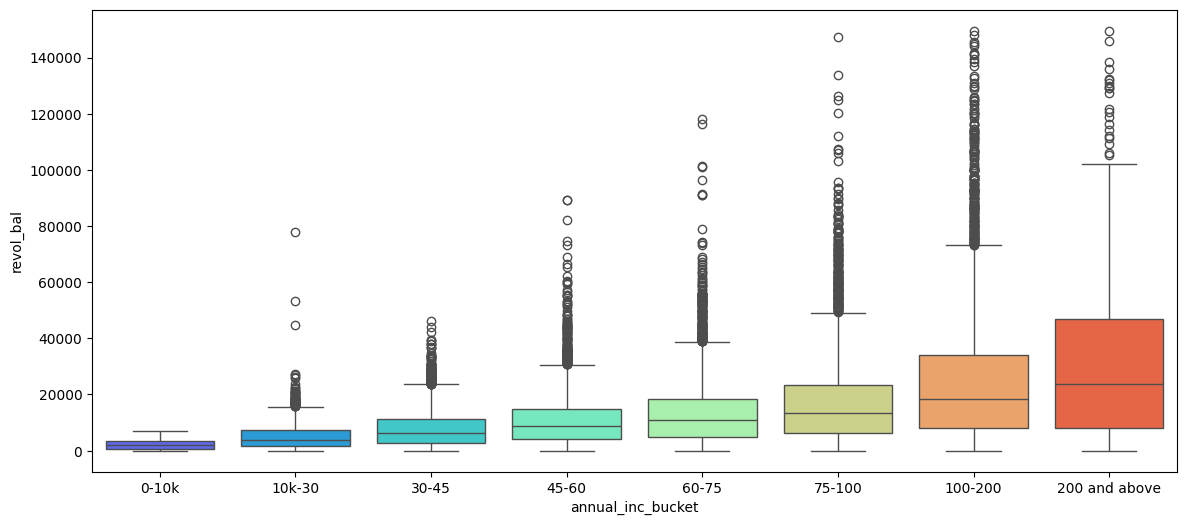

In [79]:
plt.figure(figsize=(14,6))
sns.boxplot(x = "annual_inc_bucket" , y = "revol_bal", data = df, palette = "rainbow" )

/tmp/ipykernel_9681/3593041331.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "loan_status" , y = "revol_bal", data = df, palette = "rainbow" )


<Axes: xlabel='loan_status', ylabel='revol_bal'>

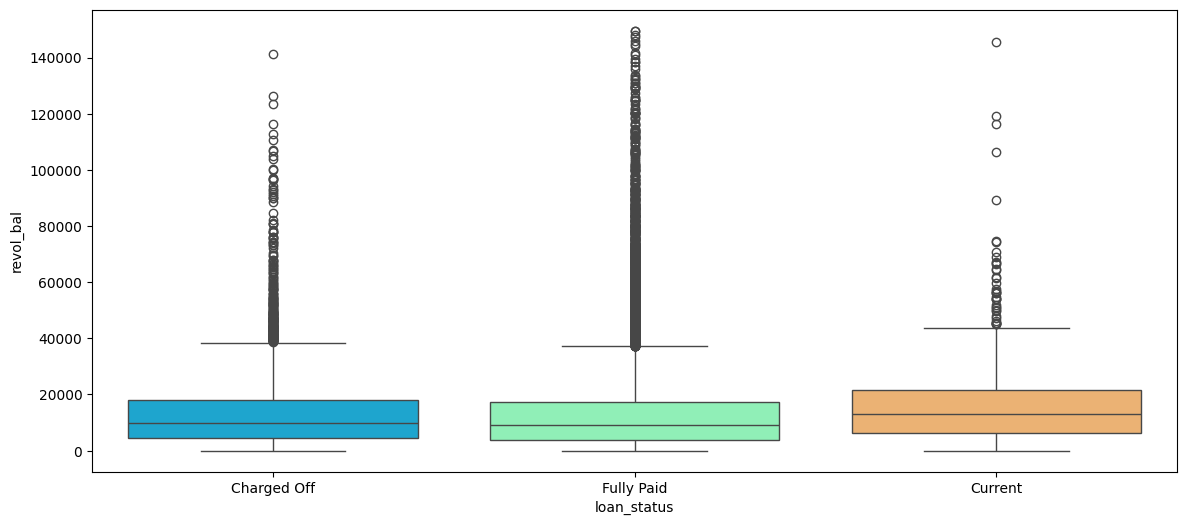

In [80]:
plt.figure(figsize=(14,6))
sns.boxplot(x = "loan_status" , y = "revol_bal", data = df, palette = "rainbow" )

/tmp/ipykernel_9681/3898855997.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "loan_status" , y = "revol_util", data = df, palette = "rainbow" )


<Axes: xlabel='loan_status', ylabel='revol_util'>

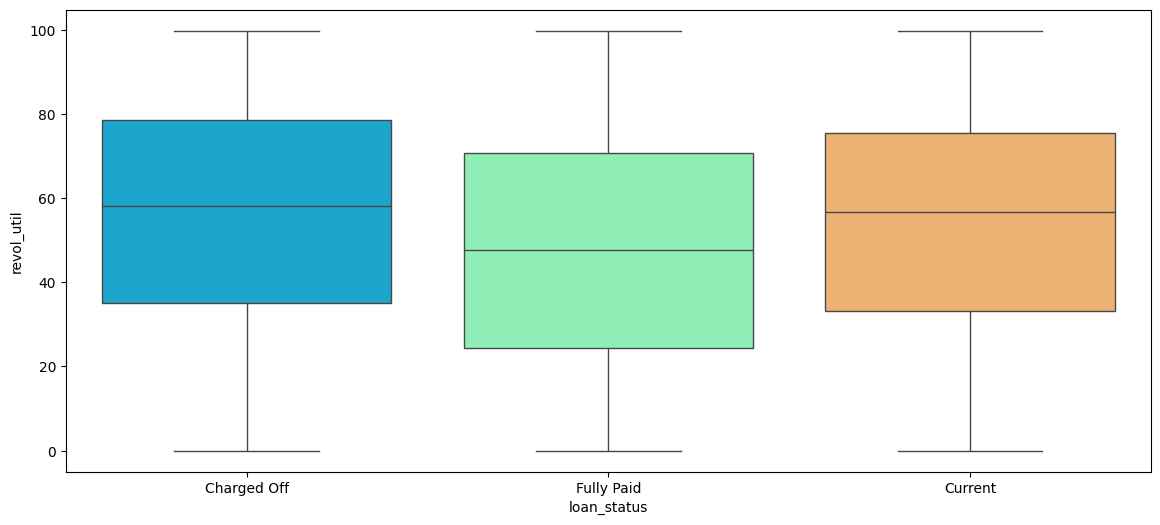

In [81]:
plt.figure(figsize=(14,6))
sns.boxplot(x = "loan_status" , y = "revol_util", data = df, palette = "rainbow" )

/tmp/ipykernel_9681/2198079081.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "annual_inc_bucket" , y = "revol_util", data = df, palette = "rainbow" )


<Axes: xlabel='annual_inc_bucket', ylabel='revol_util'>

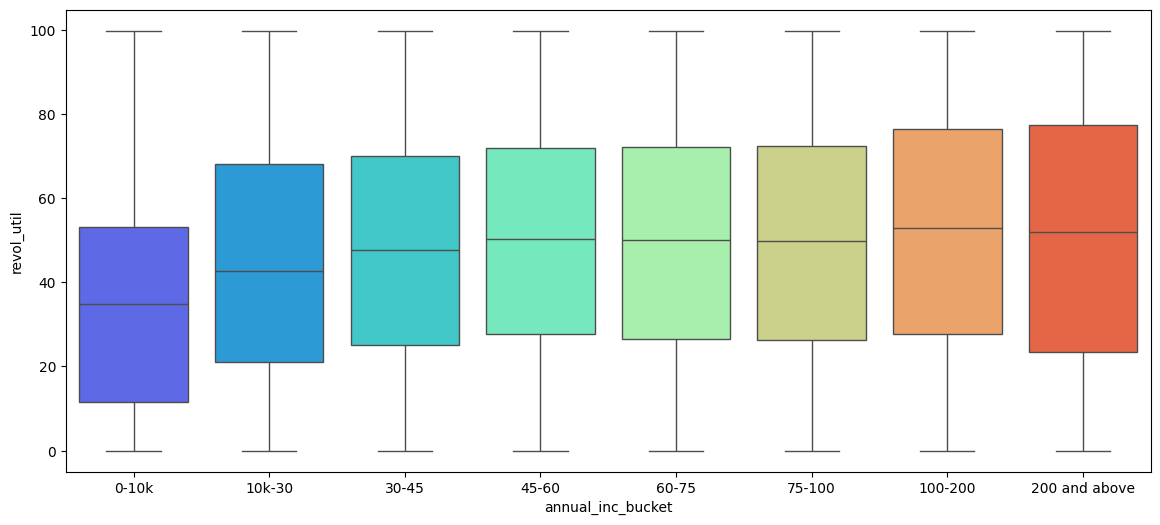

In [82]:
plt.figure(figsize=(14,6))
sns.boxplot(x = "annual_inc_bucket" , y = "revol_util", data = df, palette = "rainbow" )

/tmp/ipykernel_9681/3627199917.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "loan_status" , y = "total_pymnt", data = df, palette = "rainbow" )


<Axes: xlabel='loan_status', ylabel='total_pymnt'>

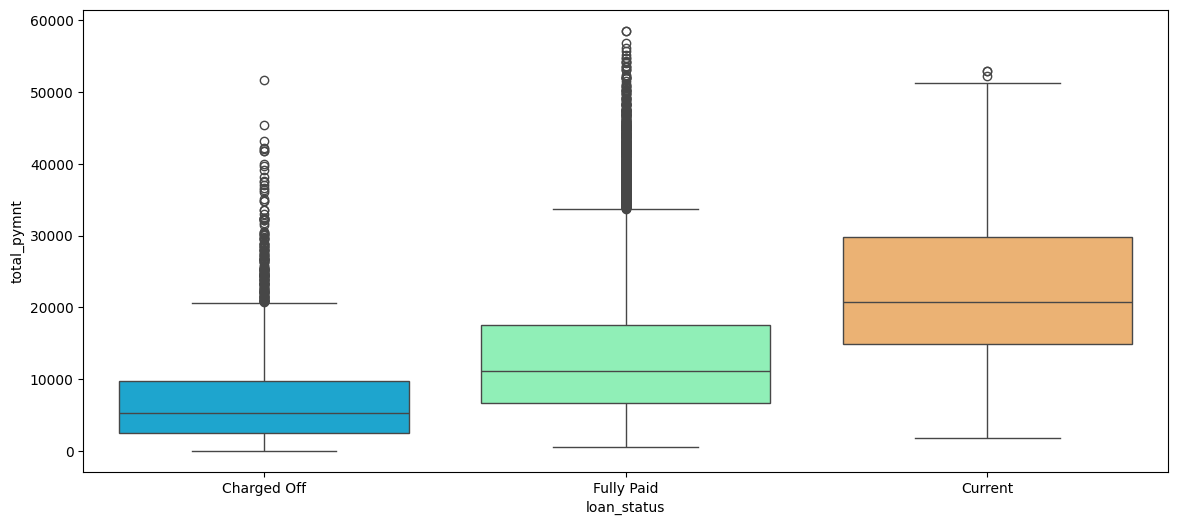

In [83]:
plt.figure(figsize=(14,6))
sns.boxplot(x = "loan_status" , y = "total_pymnt", data = df, palette = "rainbow" )

### Derived metrics

In [84]:
df.last_pymnt_d.head()

1    Apr-13
3    Jan-15
4    May-16
6    May-16
7    Jan-15
Name: last_pymnt_d, dtype: object

In [85]:
df['last_pymnt_month']=df["last_pymnt_d"].apply(lambda x: x[:3])
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
1  1077430    1314167       2500         2500           2500.0    60   
3  1076863    1277178      10000        10000          10000.0    36   
4  1075358    1311748       3000         3000           3000.0    60   
6  1069639    1304742       7000         7000           7000.0    60   
7  1072053    1288686       3000         3000           3000.0    36   

   int_rate  installment grade sub_grade  ... policy_code application_type  \
1     15.27        59.83     C        C4  ...           1       INDIVIDUAL   
3     13.49       339.31     C        C1  ...           1       INDIVIDUAL   
4     12.69        67.79     B        B5  ...           1       INDIVIDUAL   
6     15.96       170.08     C        C5  ...           1       INDIVIDUAL   
7     18.64       109.43     E        E1  ...           1       INDIVIDUAL   

  acc_now_delinq  chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies  \
1              0                       0.0           0                  0.0   
3              0                       0.0           0                  0.0   
4              0                       0.0           0                  0.0   
6              0                       0.0           0                  0.0   
7              0                       0.0           0                  0.0   

  tax_liens target annual_inc_bucket last_pymnt_month  
1       0.0      1             30-45              Apr  
3       0.0      0             45-60              Jan  
4       0.0      0            75-100              May  
6       0.0      0             45-60              May  
7       0.0      0             45-60              Jan  

[5 rows x 57 columns]

<Axes: xlabel='last_pymnt_month', ylabel='count'>

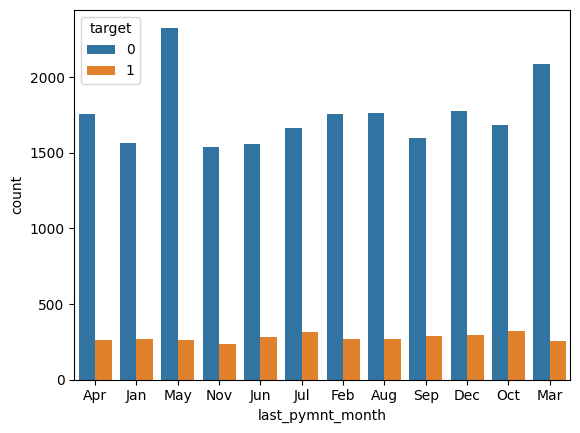

In [86]:
sns.countplot(data=df,x='last_pymnt_month',hue='target')

In [87]:
df.last_credit_pull_d.head()

1    Sep-13
3    Apr-16
4    May-16
6    May-16
7    Dec-14
Name: last_credit_pull_d, dtype: object

In [88]:
df['last_credit_month']=df["last_credit_pull_d"].apply(lambda x: x[:3])
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
1  1077430    1314167       2500         2500           2500.0    60   
3  1076863    1277178      10000        10000          10000.0    36   
4  1075358    1311748       3000         3000           3000.0    60   
6  1069639    1304742       7000         7000           7000.0    60   
7  1072053    1288686       3000         3000           3000.0    36   

   int_rate  installment grade sub_grade  ... application_type acc_now_delinq  \
1     15.27        59.83     C        C4  ...       INDIVIDUAL              0   
3     13.49       339.31     C        C1  ...       INDIVIDUAL              0   
4     12.69        67.79     B        B5  ...       INDIVIDUAL              0   
6     15.96       170.08     C        C5  ...       INDIVIDUAL              0   
7     18.64       109.43     E        E1  ...       INDIVIDUAL              0   

  chargeoff_within_12_mths  delinq_amnt pub_rec_bankruptcies tax_liens target  \
1                      0.0            0                  0.0       0.0      1   
3                      0.0            0                  0.0       0.0      0   
4                      0.0            0                  0.0       0.0      0   
6                      0.0            0                  0.0       0.0      0   
7                      0.0            0                  0.0       0.0      0   

  annual_inc_bucket last_pymnt_month last_credit_month  
1             30-45              Apr               Sep  
3             45-60              Jan               Apr  
4            75-100              May               May  
6             45-60              May               May  
7             45-60              Jan               Dec  

[5 rows x 58 columns]

<Axes: xlabel='last_credit_month', ylabel='count'>

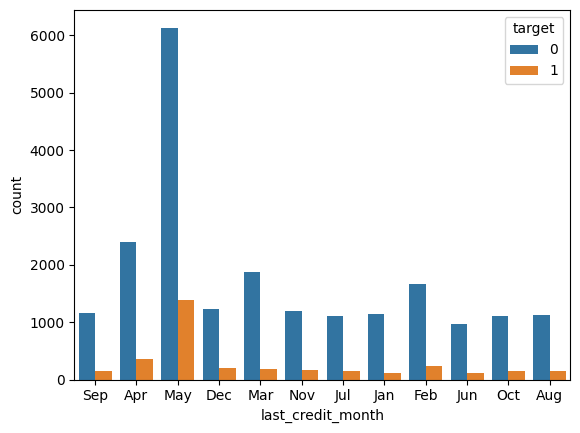

In [89]:
sns.countplot(data=df,x='last_credit_month',hue='target')

#### Key Takeaway:
We can observe that the month May has more defaulted values compared to other in last_credit_pull_d months.

#### Data correlation

In [90]:
clm=df.columns
for i in clm:
    try:
        print('correlation between ',i,'and target is ',df[i].corr(df['target']))
    except:
        pass

correlation between  id and target is  0.03673253963497522
correlation between  member_id and target is  0.034441413907688234
correlation between  loan_amnt and target is  0.06254209429681327
correlation between  funded_amnt and target is  0.059312663743951284
correlation between  funded_amnt_inv and target is  0.04038090534639854
correlation between  term and target is  0.155690849550945
correlation between  int_rate and target is  0.1998836331707381
correlation between  installment and target is  0.03284827436373681
correlation between  annual_inc and target is  -0.040088729493519576
correlation between  dti and target is  0.04315782986192553
correlation between  delinq_2yrs and target is  0.004594664370488922
correlation between  inq_last_6mths and target is  0.06867779531658734
correlation between  open_acc and target is  0.005727818399545247
correlation between  pub_rec and target is  0.047954897379819485
correlation between  revol_bal and target is  0.012073946164679664
correlati

In [91]:
data=df.drop(['collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',"tax_liens"],axis=1)

In [92]:
data.corr(numeric_only=True)

id  member_id  loan_amnt  funded_amnt  \
id                       1.000000   0.992652   0.185018     0.195112   
member_id                0.992652   1.000000   0.186839     0.196282   
loan_amnt                0.185018   0.186839   1.000000     0.978518   
funded_amnt              0.195112   0.196282   0.978518     1.000000   
funded_amnt_inv          0.274752   0.286134   0.941039     0.963216   
term                     0.289623   0.306449   0.366977     0.344996   
int_rate                 0.072468   0.067442   0.322675     0.328297   
installment              0.107991   0.105578   0.923123     0.952919   
annual_inc               0.023207   0.024262   0.291171     0.284355   
dti                      0.095201   0.096885   0.074483     0.075066   
delinq_2yrs             -0.005760  -0.005909  -0.029875    -0.030673   
inq_last_6mths          -0.049798  -0.054716   0.002819     0.003127   
open_acc                 0.028410   0.025860   0.171012     0.169338   
pub_rec                 -0.022991  -0.023470  -0.052226    -0.052541   
revol_bal                0.004196   0.000253   0.323055     0.314332   
revol_util               0.087072   0.086368   0.082616     0.087317   
total_acc                0.050960   0.052833   0.258393     0.252308   
out_prncp                0.197835   0.186569   0.194611     0.197153   
out_prncp_inv            0.197789   0.186510   0.194132     0.196737   
total_pymnt              0.175471   0.178347   0.879894     0.899322   
total_pymnt_inv          0.242072   0.253477   0.850954     0.870896   
total_rec_prncp          0.143106   0.146180   0.843675     0.864543   
total_rec_int            0.208084   0.210173   0.726138     0.736743   
total_rec_late_fee      -0.057224  -0.059041   0.044833     0.046768   
recoveries               0.042641   0.040963   0.136308     0.137191   
collection_recovery_fee -0.010861  -0.012047   0.073955     0.075684   
last_pymnt_amnt          0.153136   0.154916   0.439791     0.443223   
pub_rec_bankruptcies    -0.008787  -0.009110  -0.030746    -0.032316   
target                   0.036733   0.034441   0.062542     0.059313   

                         funded_amnt_inv      term  int_rate  installment  \
id                              0.274752  0.289623  0.072468     0.107991   
member_id                       0.286134  0.306449  0.067442     0.105578   
loan_amnt                       0.941039  0.366977  0.322675     0.923123   
funded_amnt                     0.963216  0.344996  0.328297     0.952919   
funded_amnt_inv                 1.000000  0.365834  0.315755     0.906248   
term                            0.365834  1.000000  0.446307     0.093978   
int_rate                        0.315755  0.446307  1.000000     0.297322   
installment                     0.906248  0.093978  0.297322     1.000000   
annual_inc                      0.270073  0.050792  0.062556     0.287215   
dti                             0.079805  0.092698  0.122361     0.061464   
delinq_2yrs                    -0.036480  0.009314  0.156381    -0.018856   
inq_last_6mths                 -0.009877  0.037197  0.128624     0.004882   
open_acc                        0.155227  0.049737  0.028070     0.167623   
pub_rec                        -0.059021  0.008870  0.101293    -0.046907   
revol_bal                       0.291665  0.065084  0.111564     0.319217   
revol_util                      0.088450  0.075282  0.464514     0.113280   
total_acc                       0.240084  0.092812 -0.027197     0.234228   
out_prncp                       0.205843  0.222421  0.136445     0.126103   
out_prncp_inv                   0.205857  0.222101  0.136442     0.125846   
total_pymnt                     0.880877  0.332951  0.321152     0.851159   
total_pymnt_inv                 0.909679  0.349652  0.310929     0.815166   
total_rec_prncp                 0.844287  0.218114  0.196974     0.844768   
total_rec_int                   0.730981  0.531355  0.541091     0.629444   
total_rec_late_fee    

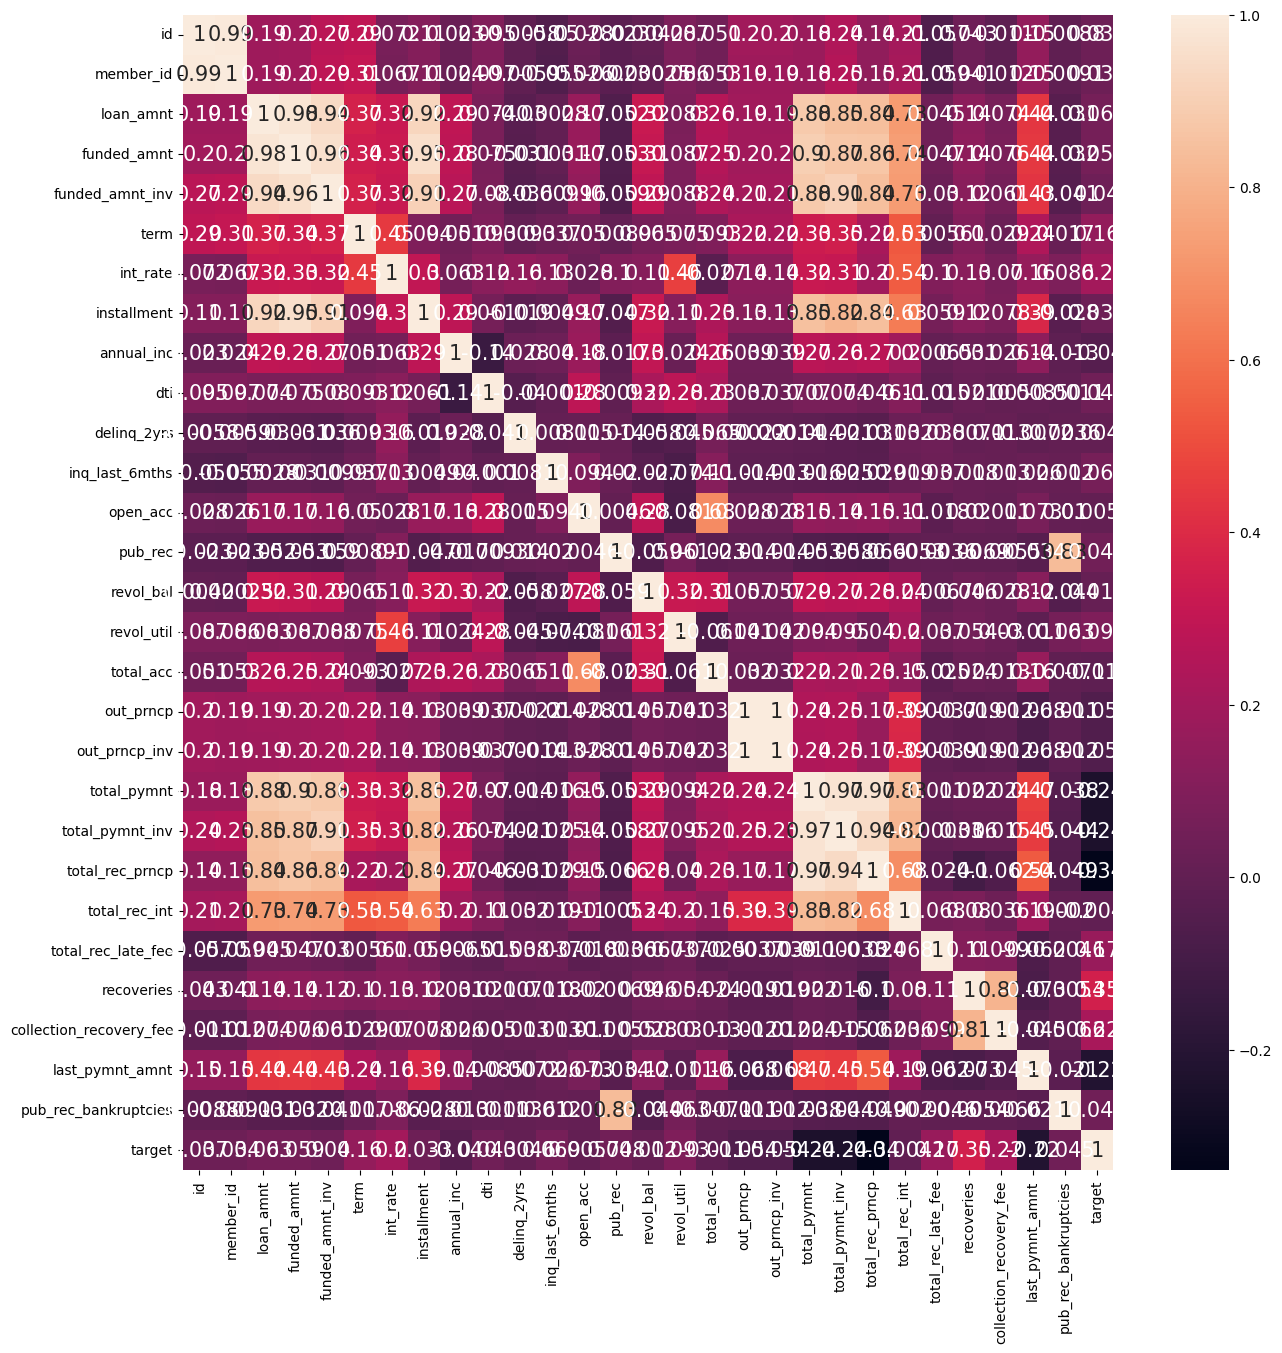

In [115]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(numeric_only=True), annot=True,annot_kws={'size': 15})
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.show()

#### Key Takeaway:
From the above heatmap we can obsereve that the columns term, int_rate, revol_util has positive correlation with the target column and total_payment, total_payment_inv, total_rec_prncp, total_rec_late_fee, recoveries, collection_recovery_fee and last_payment_amount  has negative correlation with the target column.

And we also observe that columns  loan_amnt, funded_amnt, funded_amnt_inv, total_payment, total_payment_inv, total_rec_prncp, total_rec_int has high correlation among them self.

## Conclusion:

The columns loan_amnt, funded_amnt, funded_amnt_inv, int_rate, installement, dti, revol_bal, revol_util, total_rec_late_fee, recoveries,& collection_recovery_fee has high defaulted values.

We can also observe that in grades geade C, B,  D has more defalted vales than other, and in emp_length 10+ years has more defalted vales than other, and in home owership Rent & Mortgage has more defalted vales than other, and in purpose column debt_consolidation has more defalted vales than other and in add_state CA has more defalted vales than other.